abtype1,,,,,,,
abtype2,,,,,,,
abtype3,,,,,,,
abtype4,,,,,,,
abtype5,,,,,,,
abtype6,,,,,,,
abtype7,,,,,,,

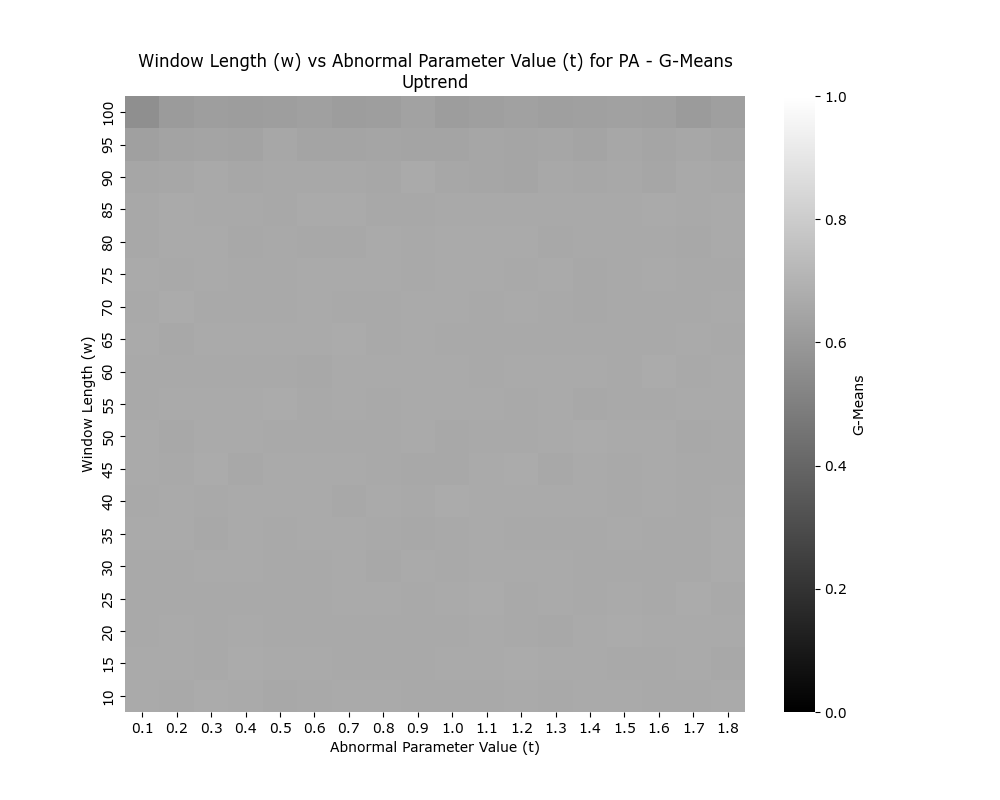
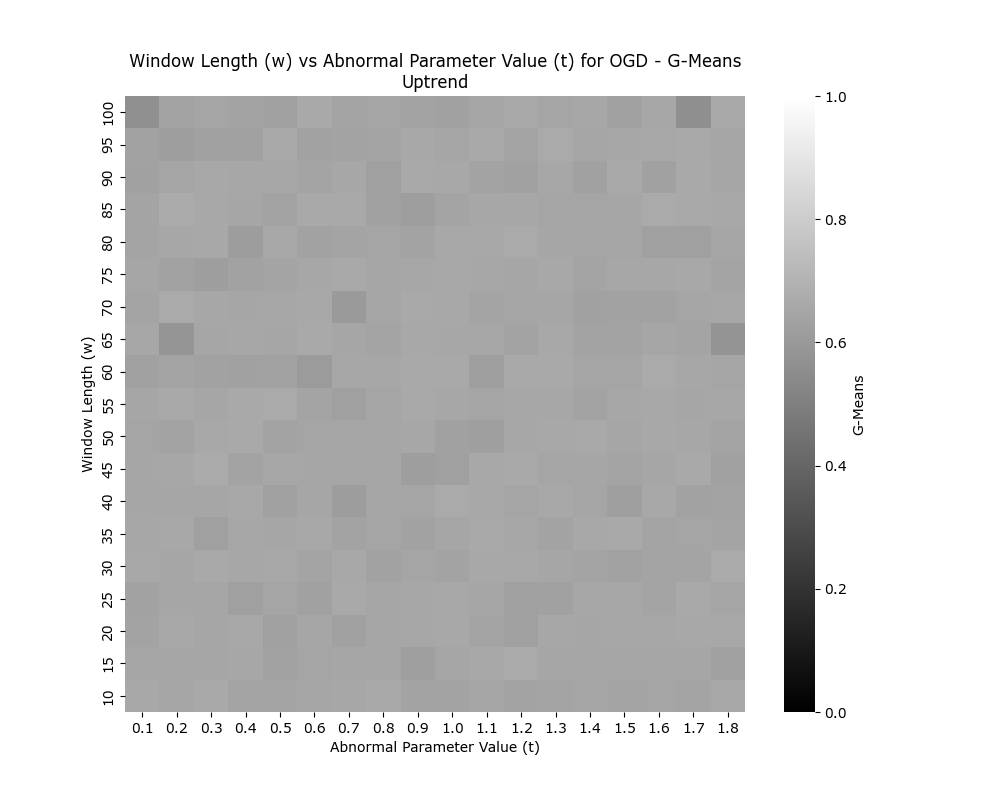
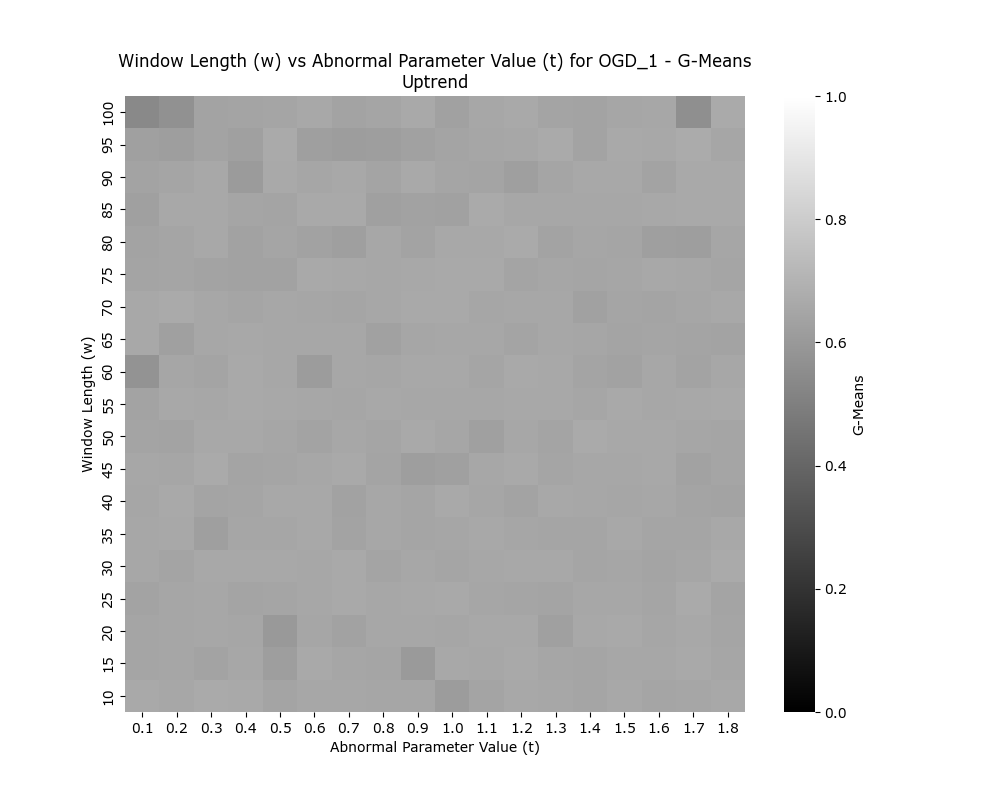
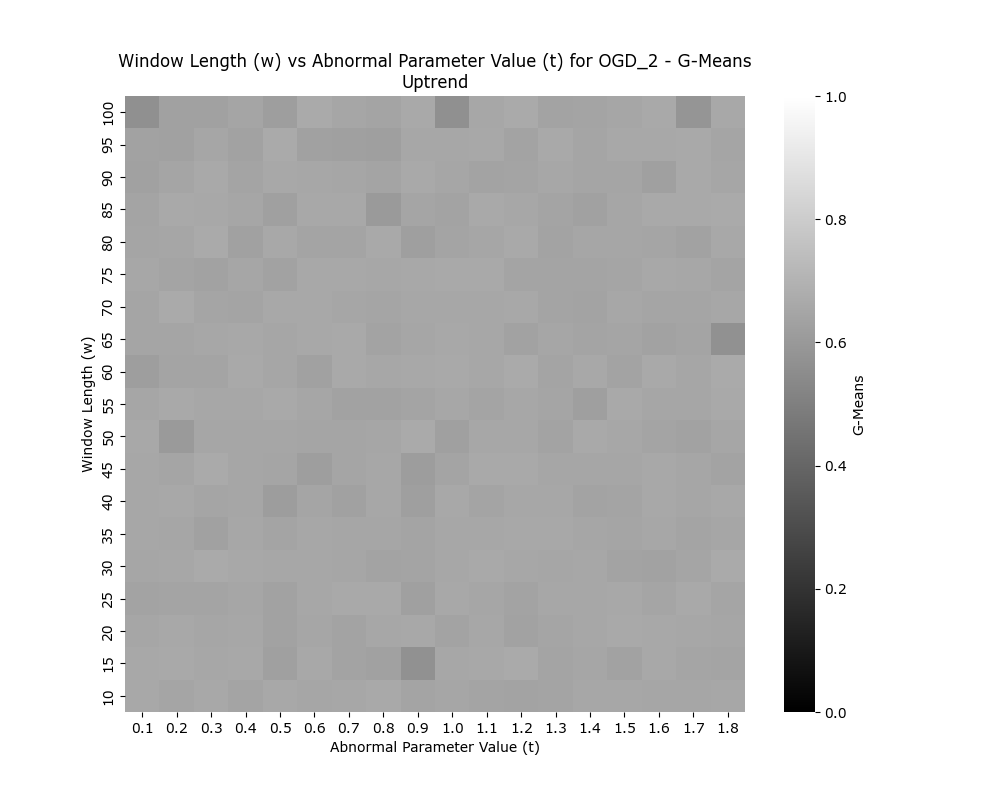
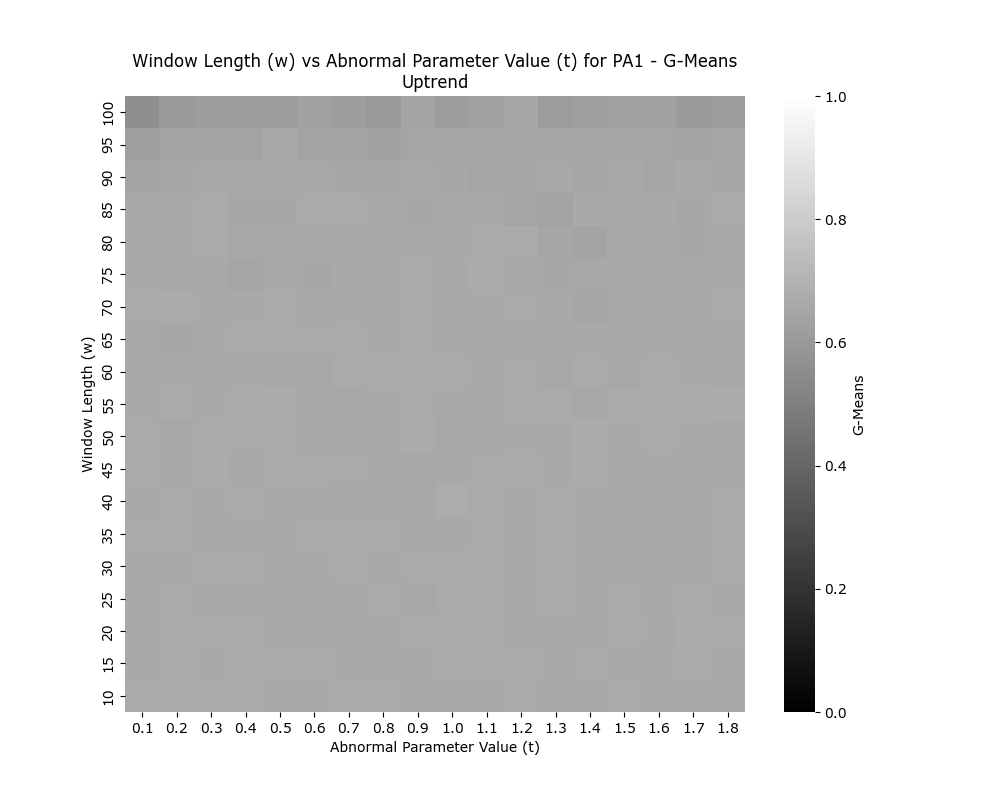
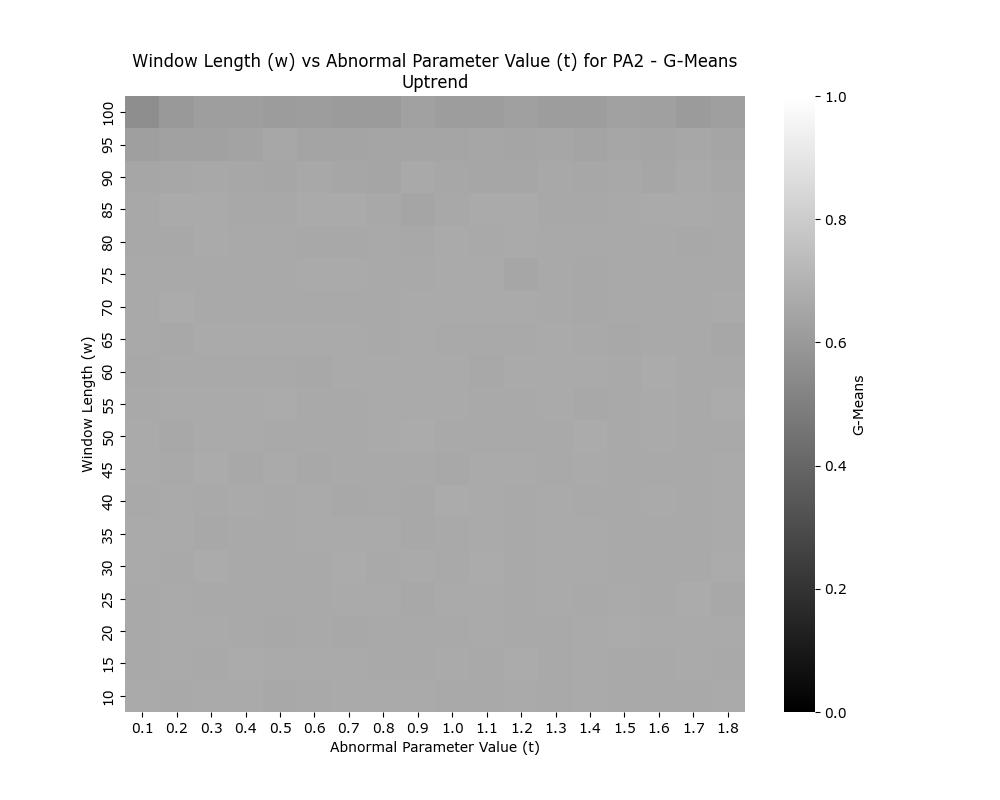
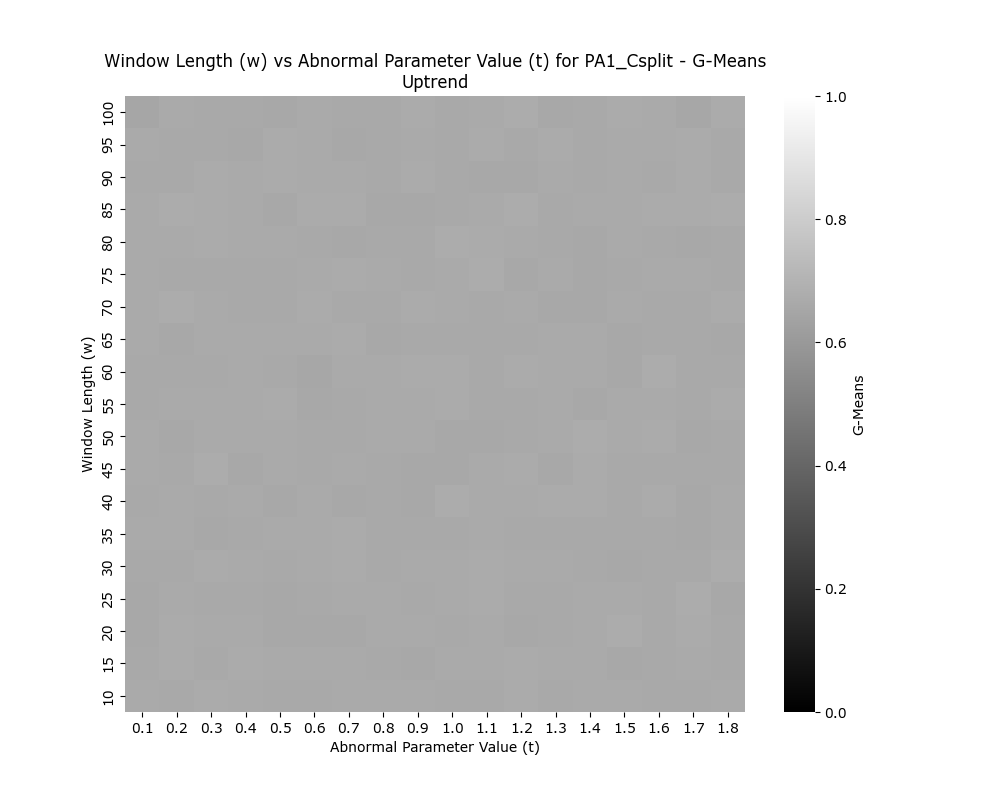
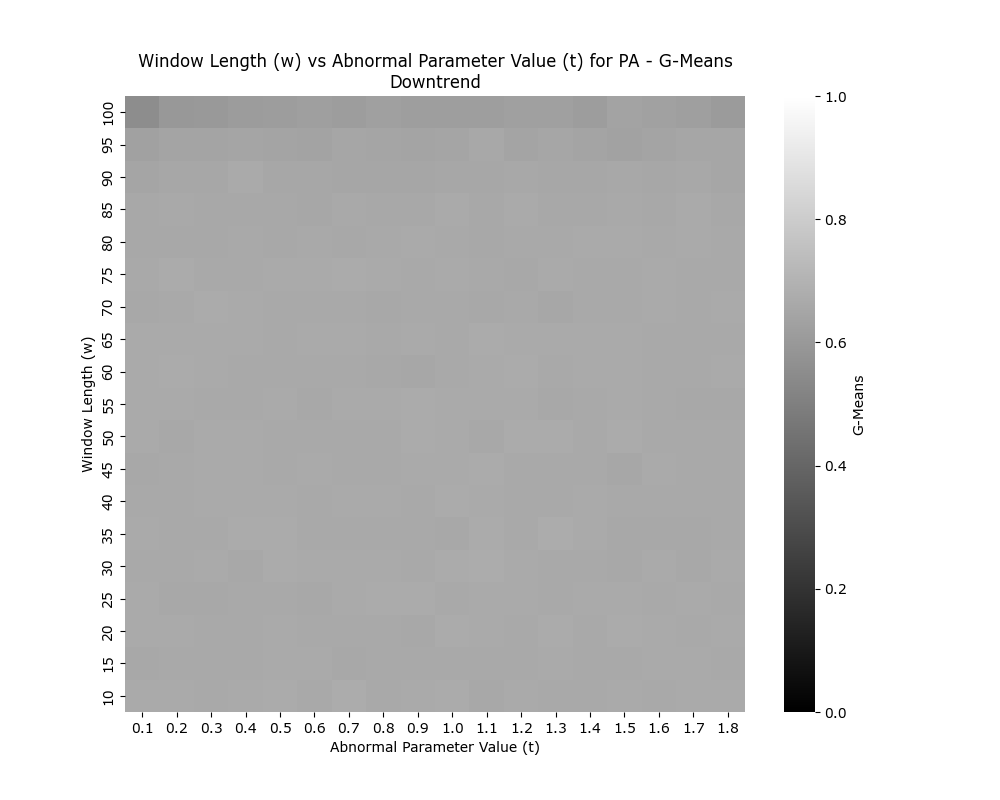
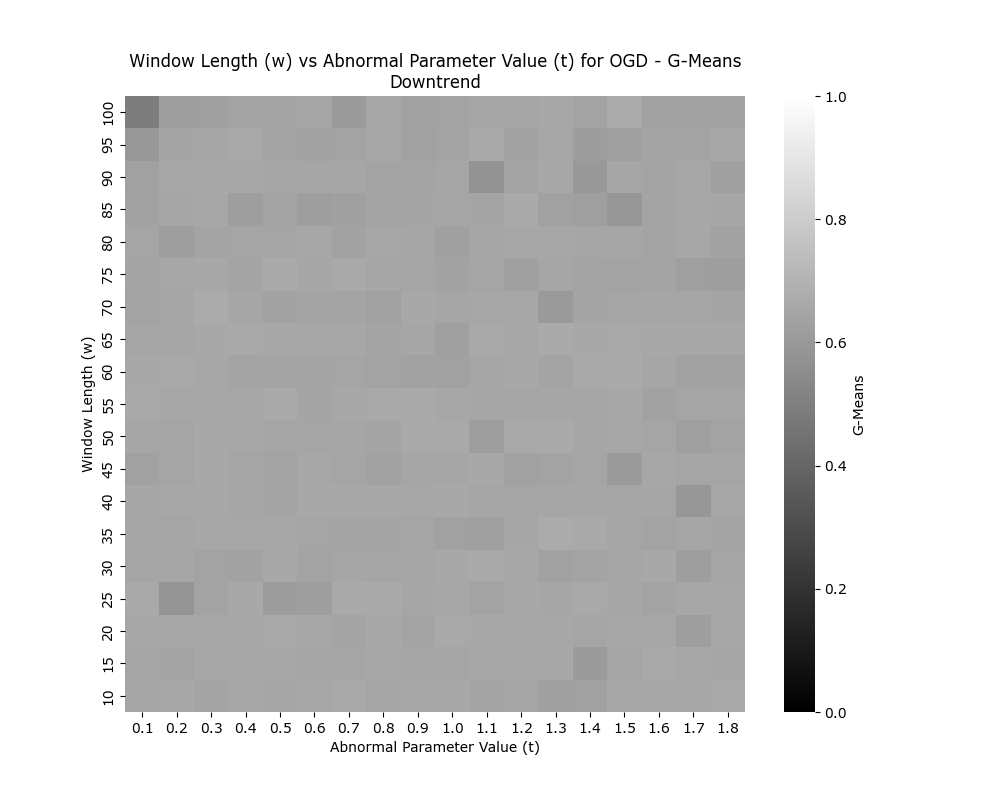
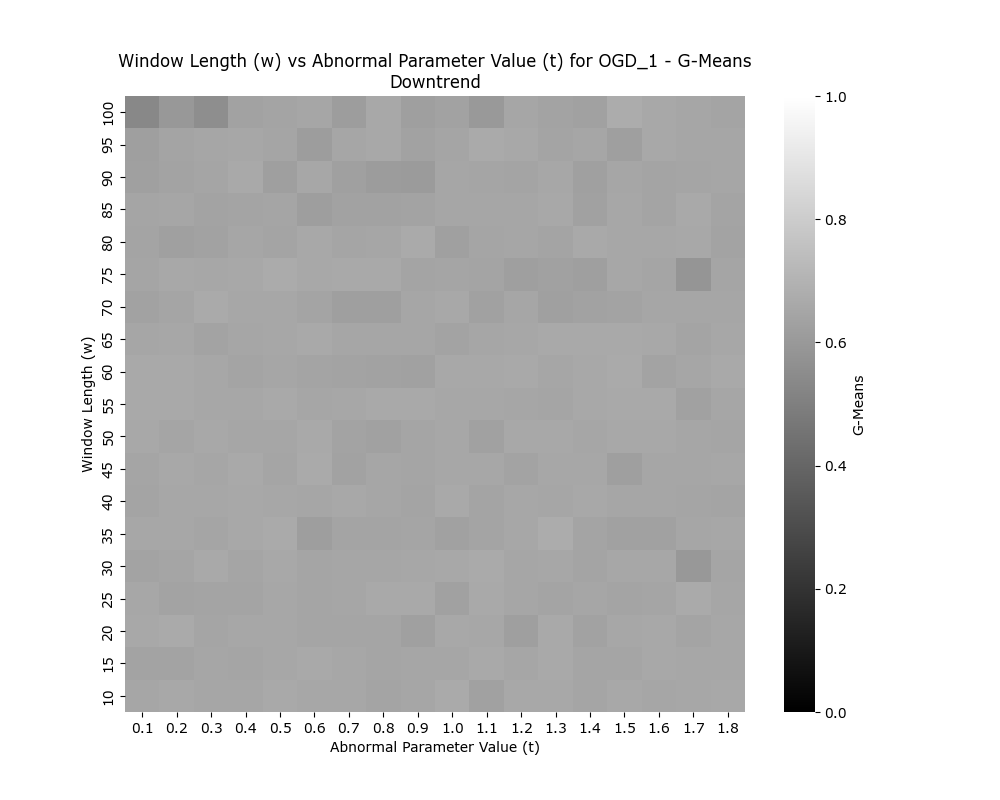
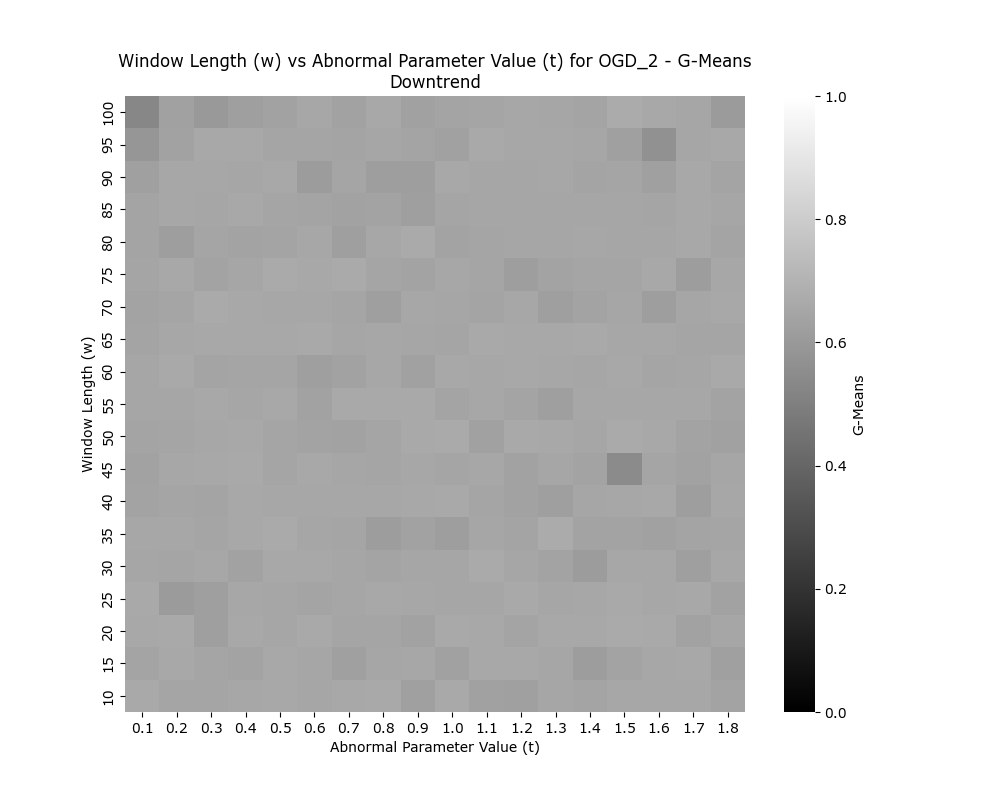
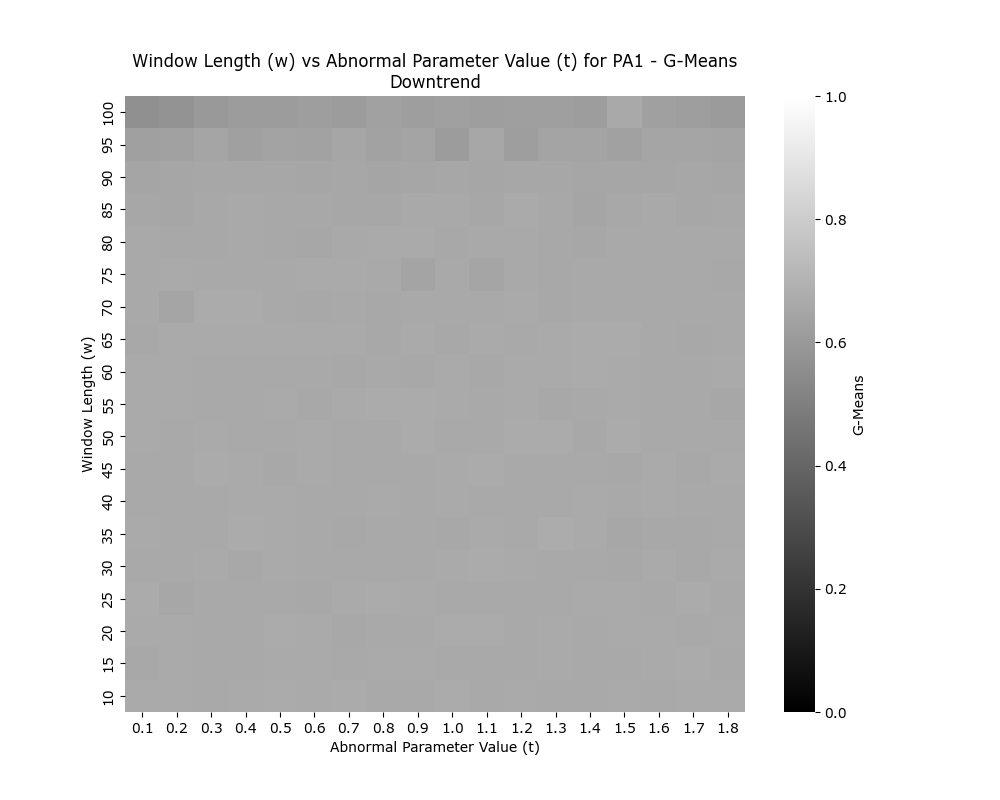
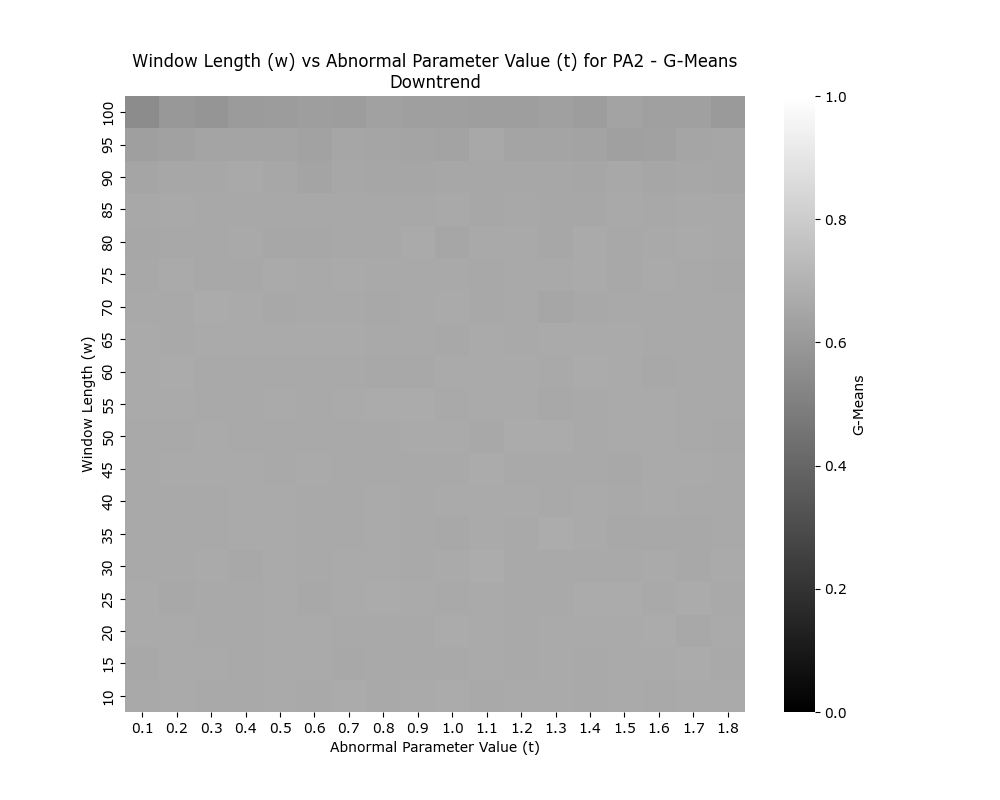
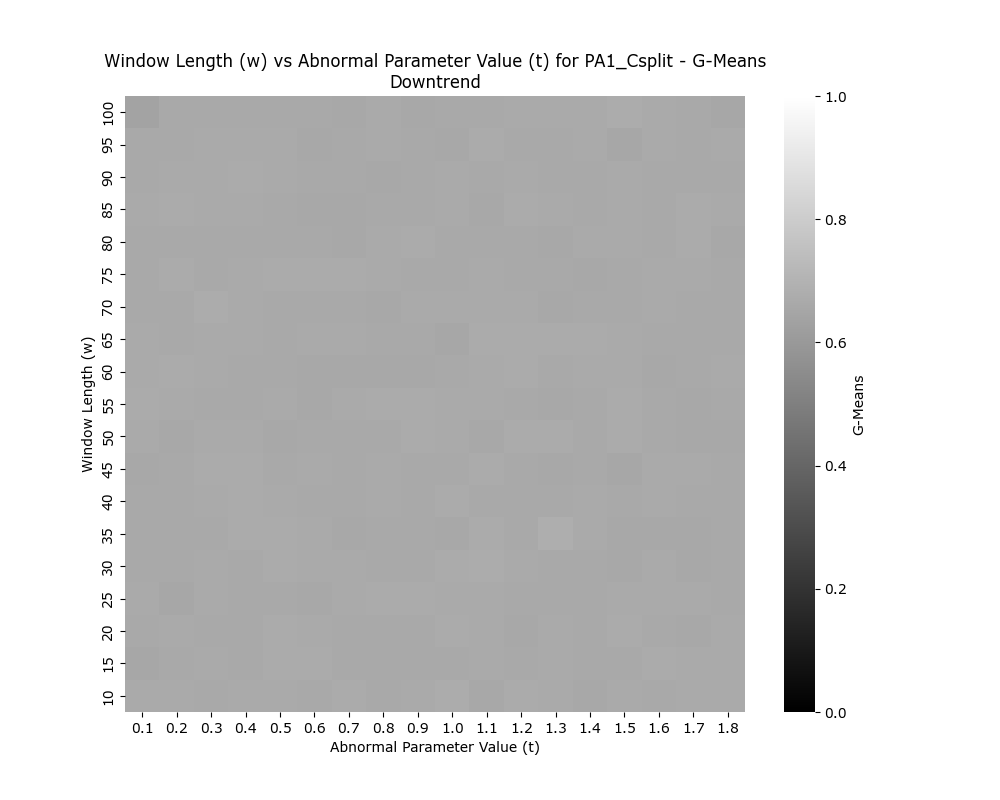
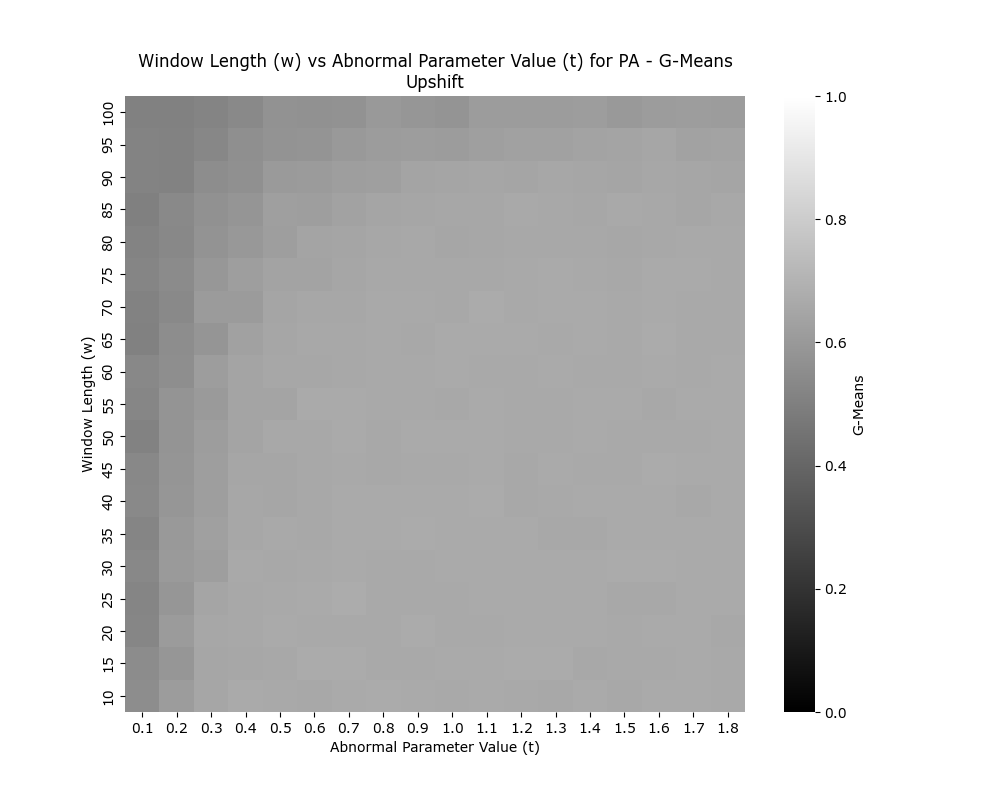
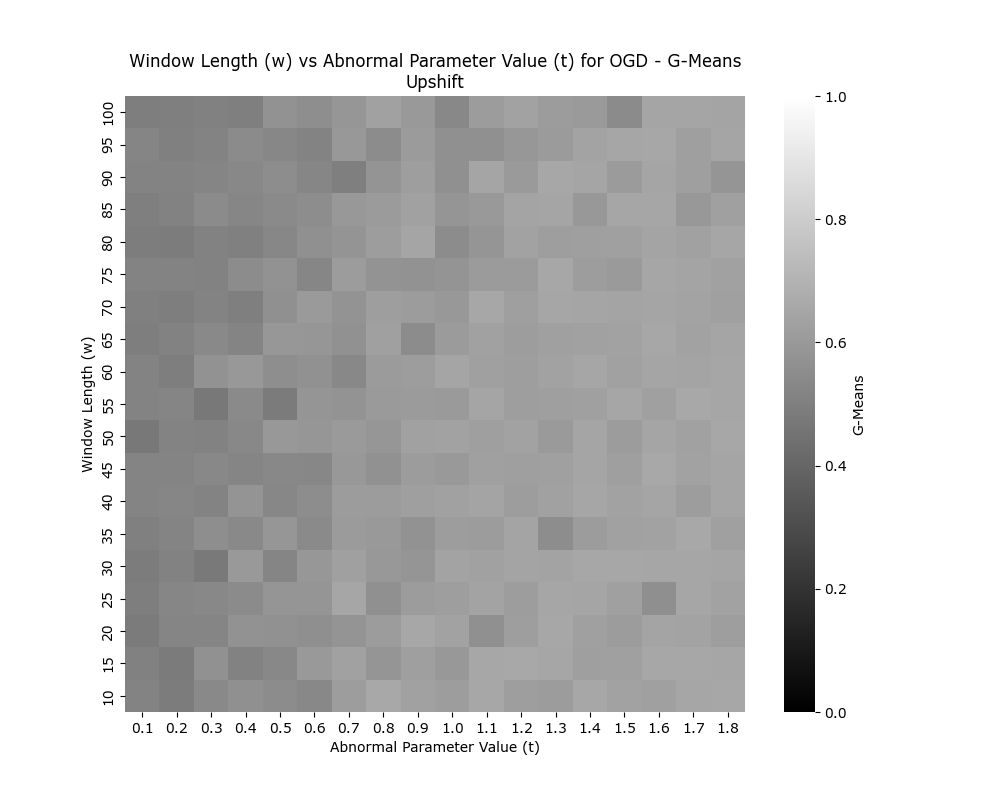
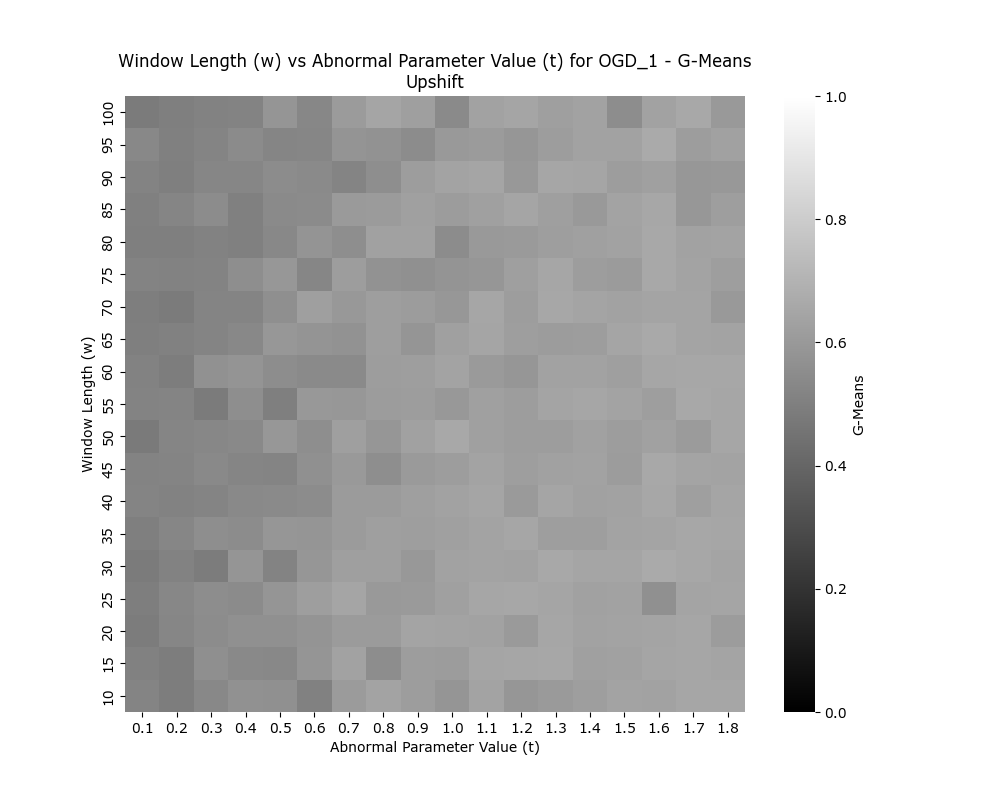
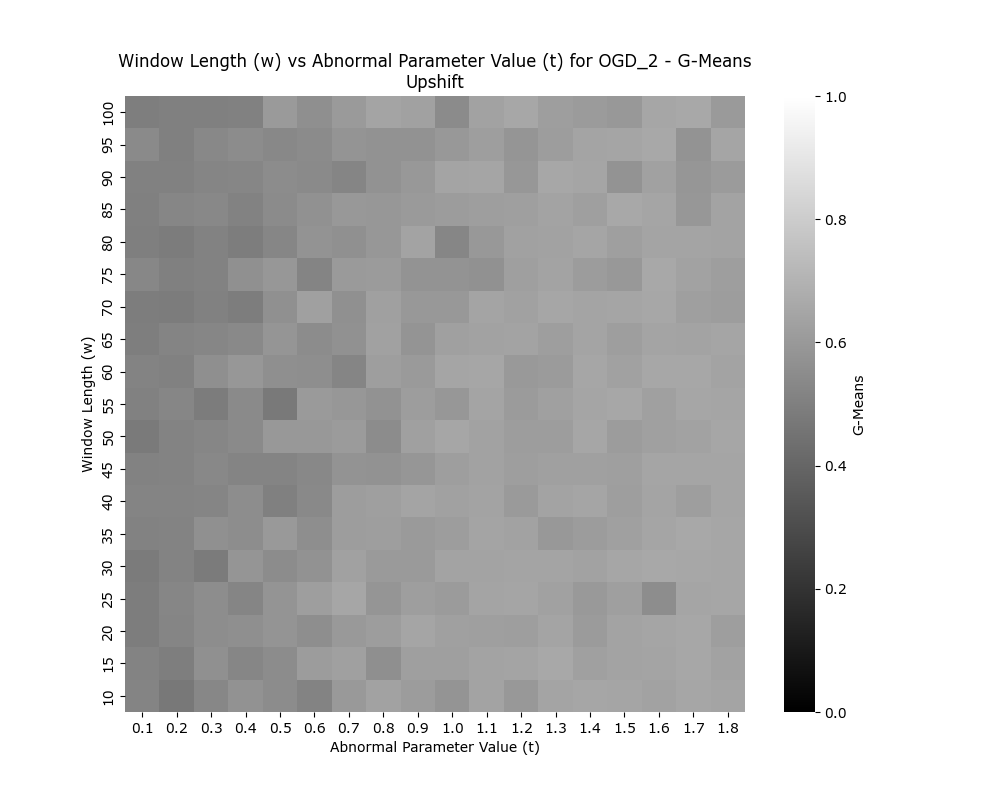
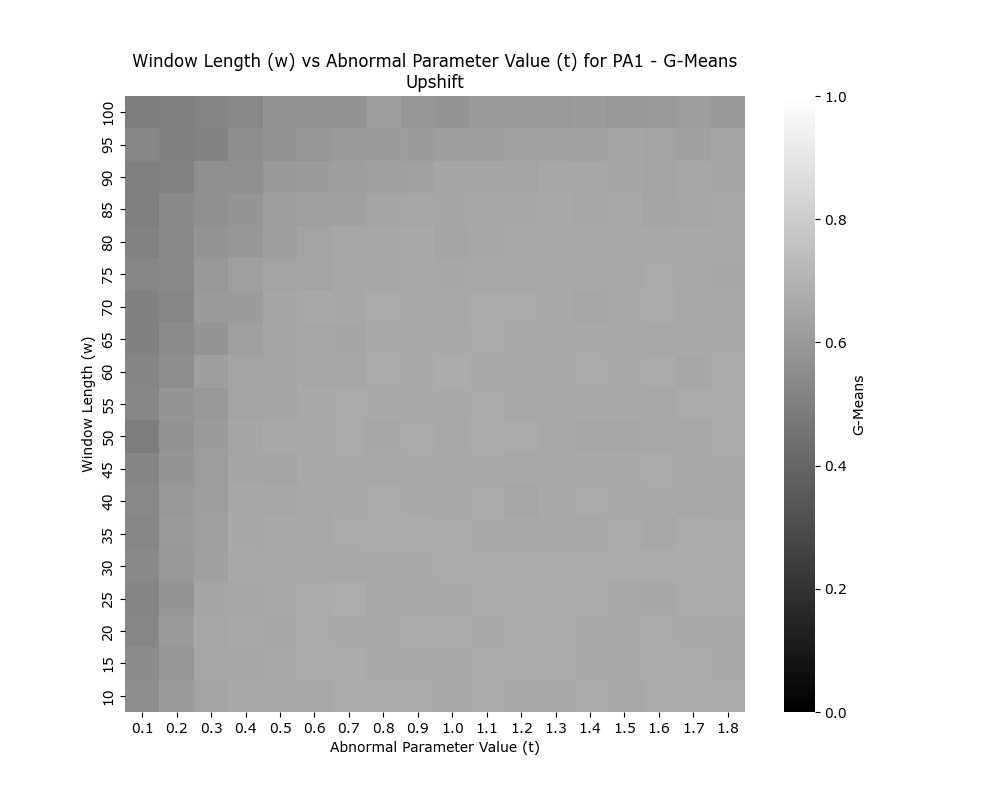
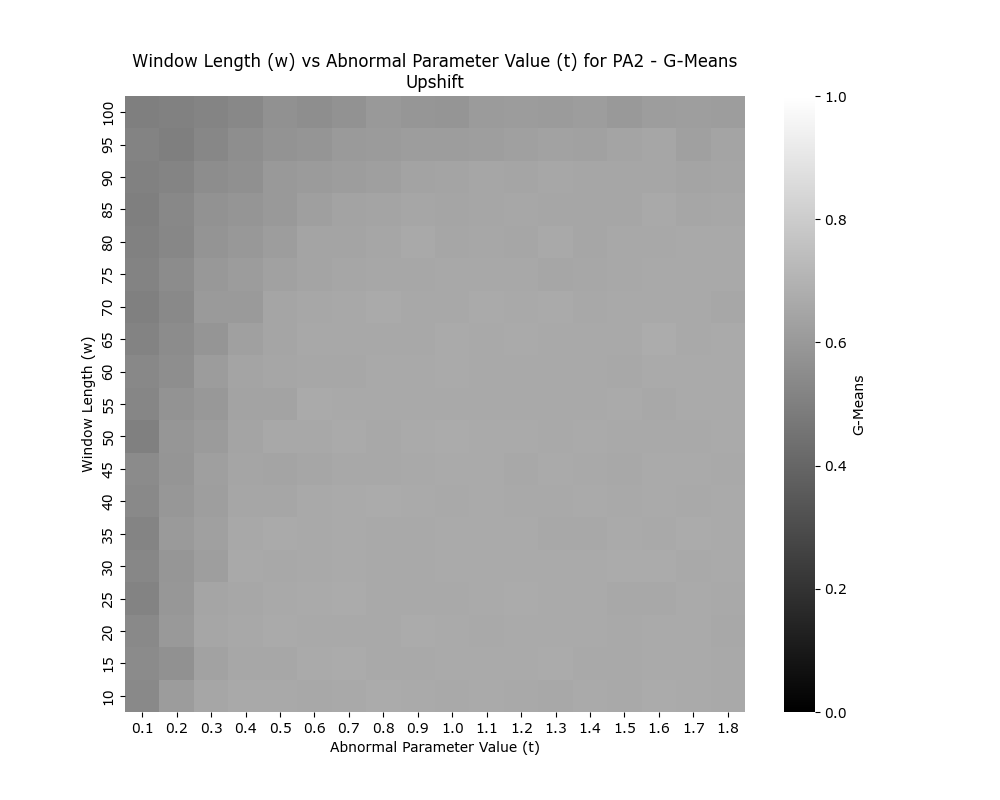
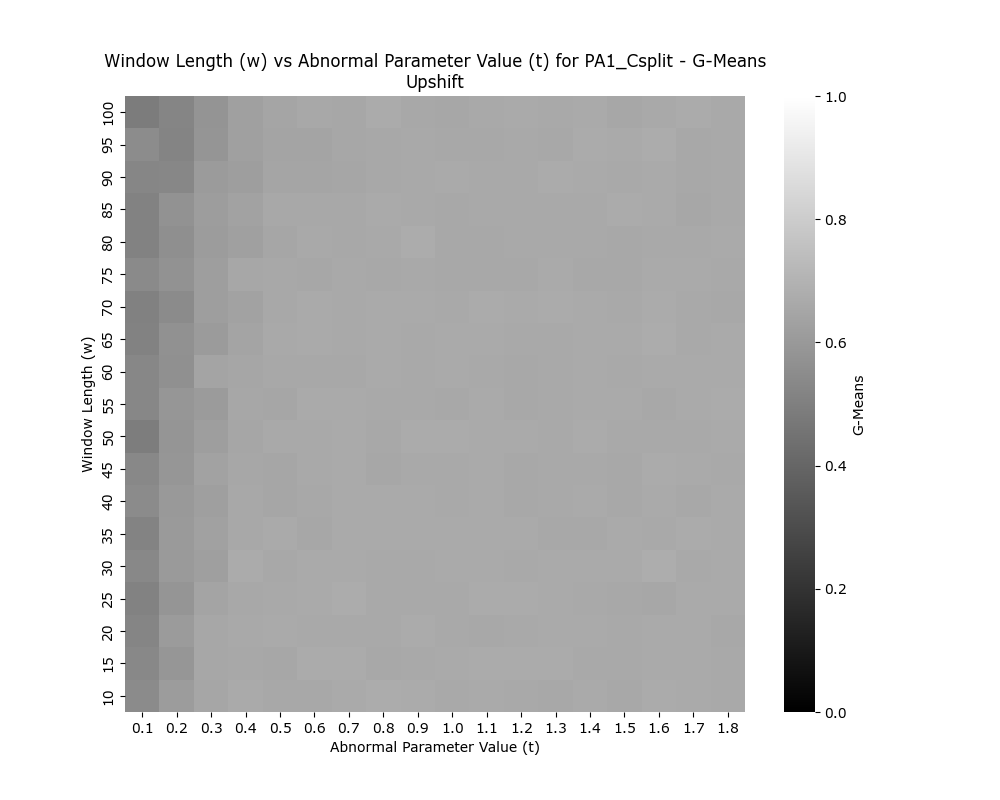
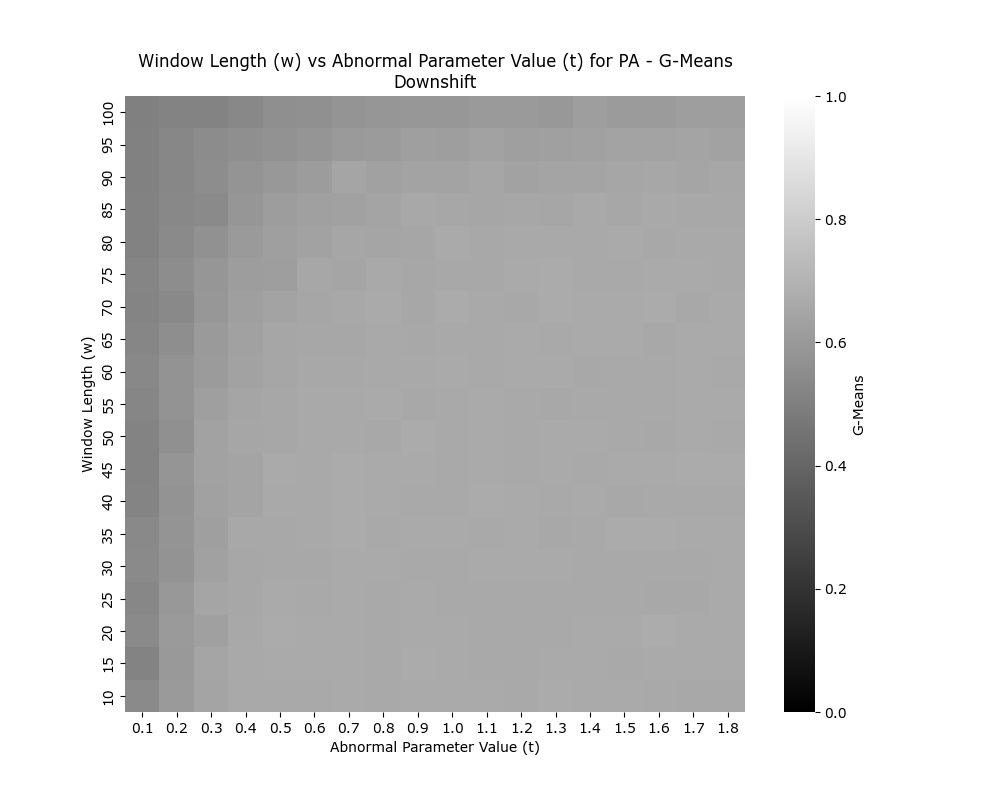
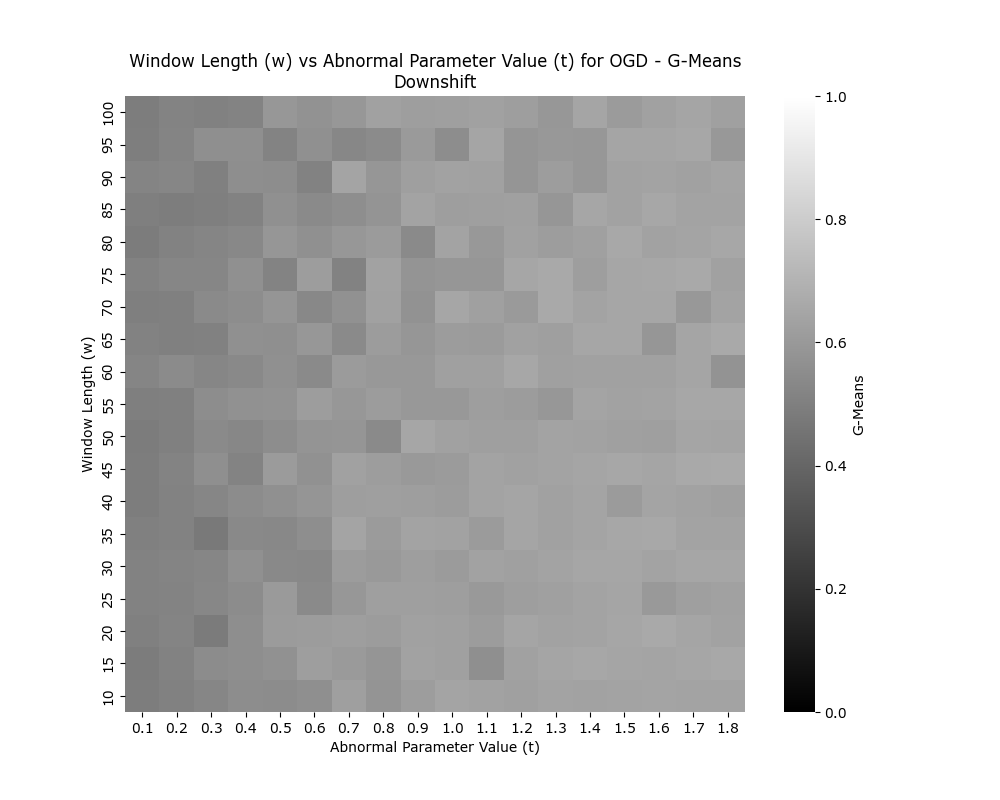
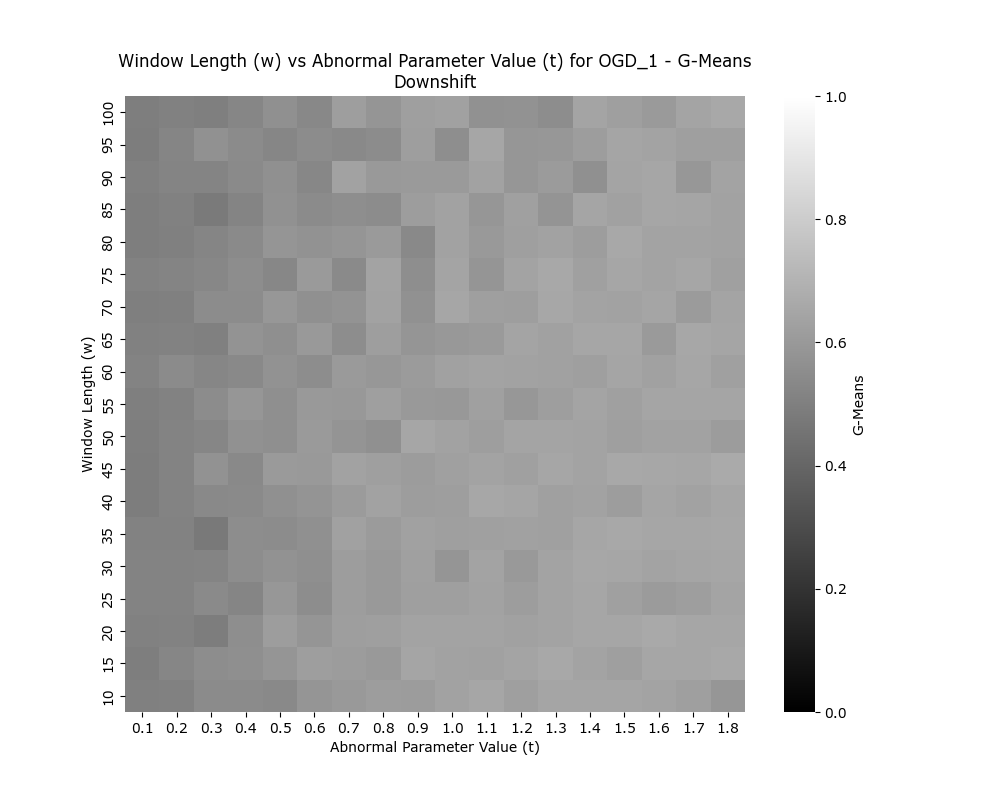
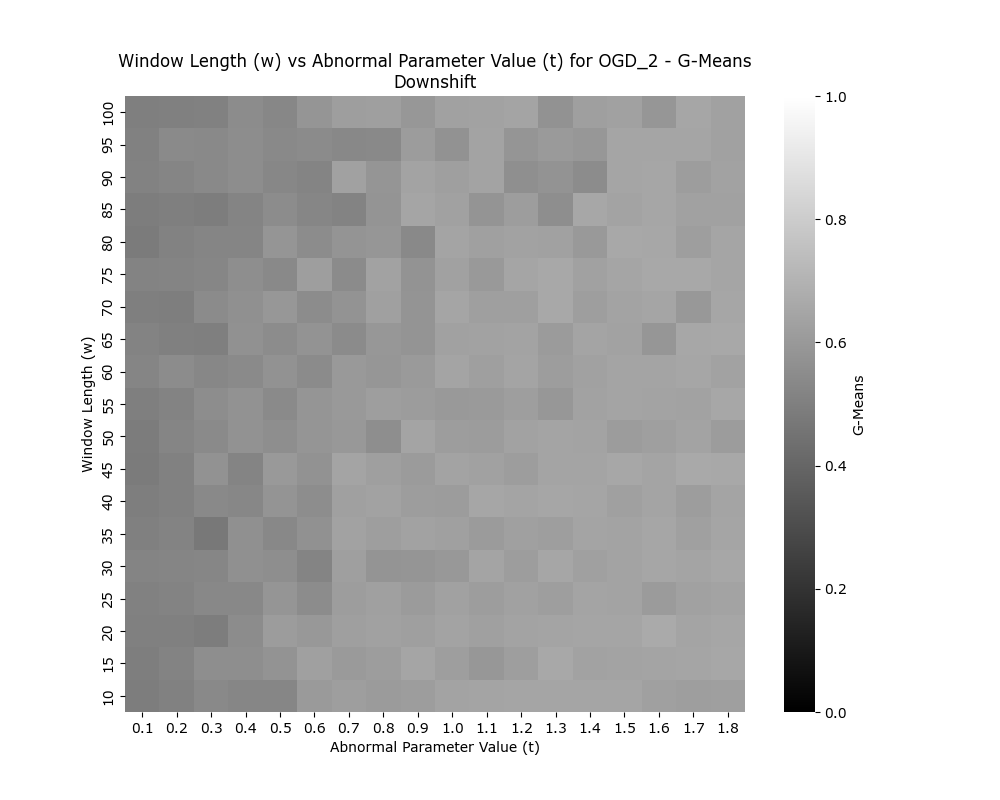
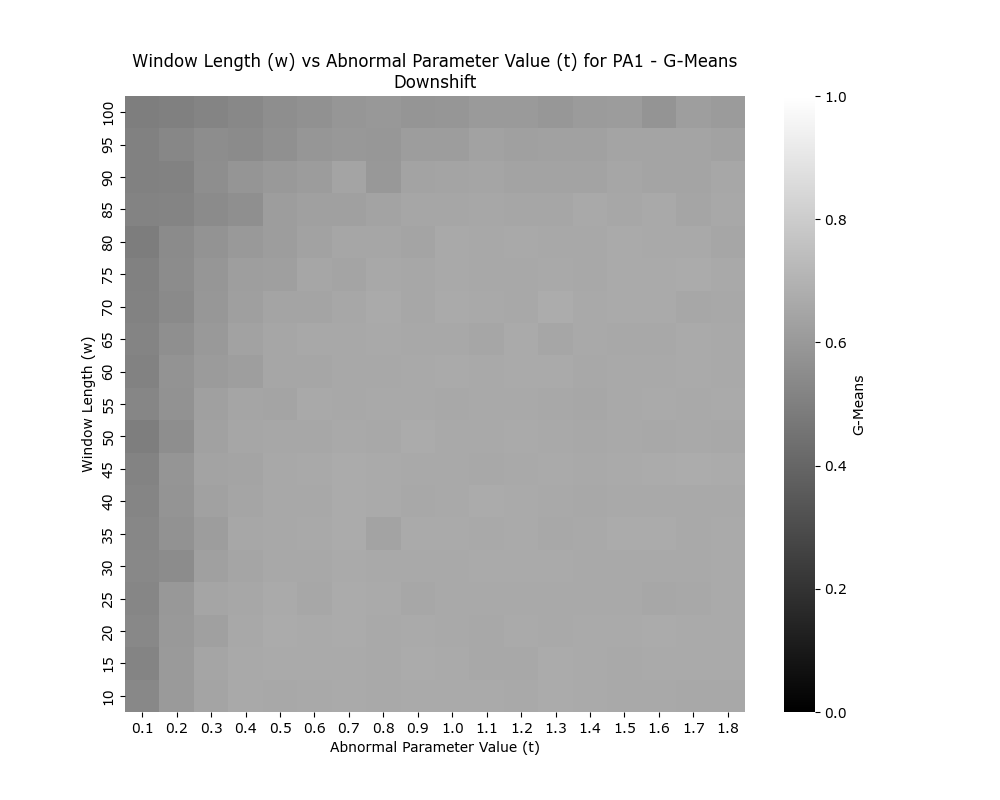
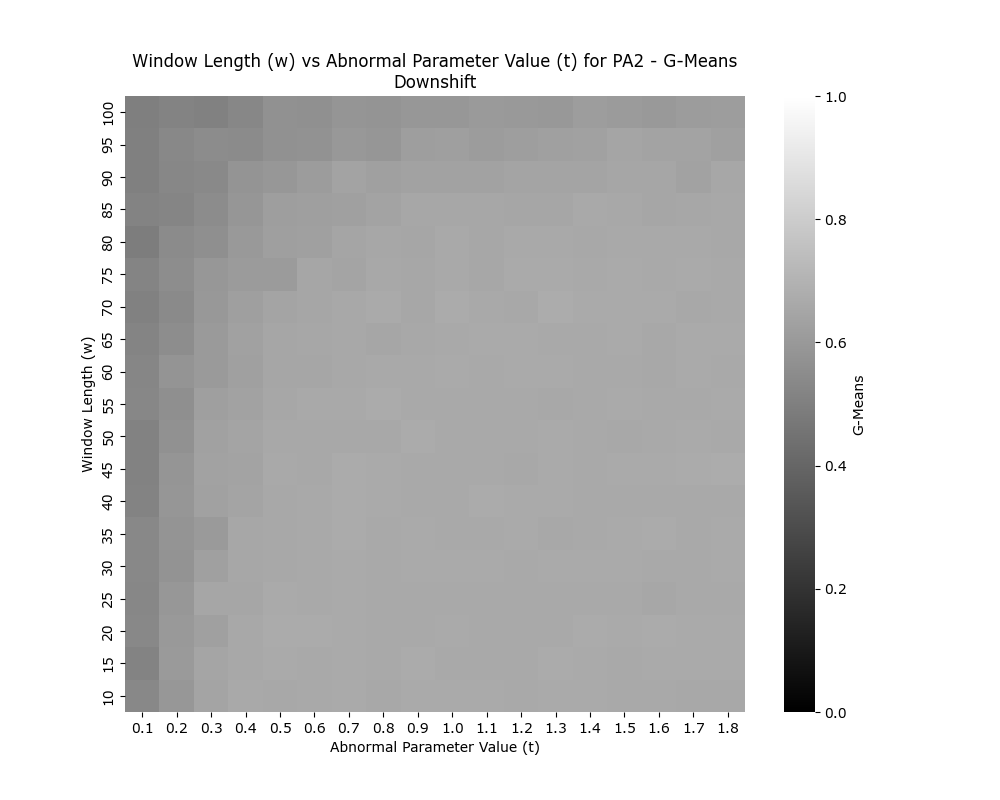
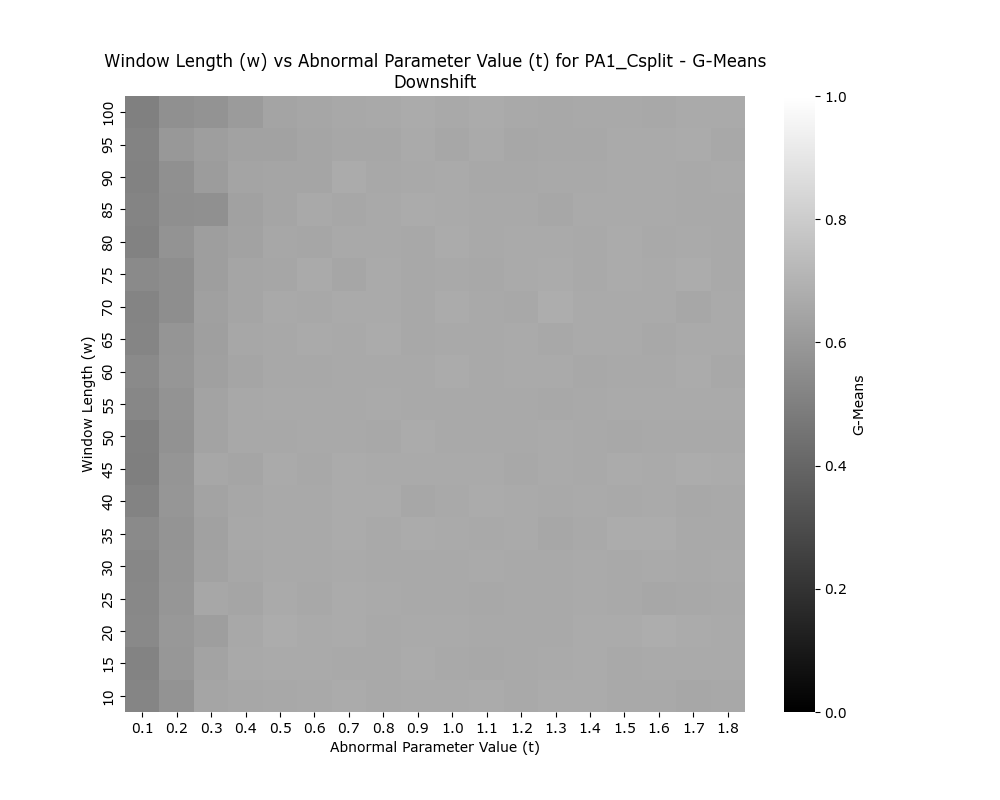
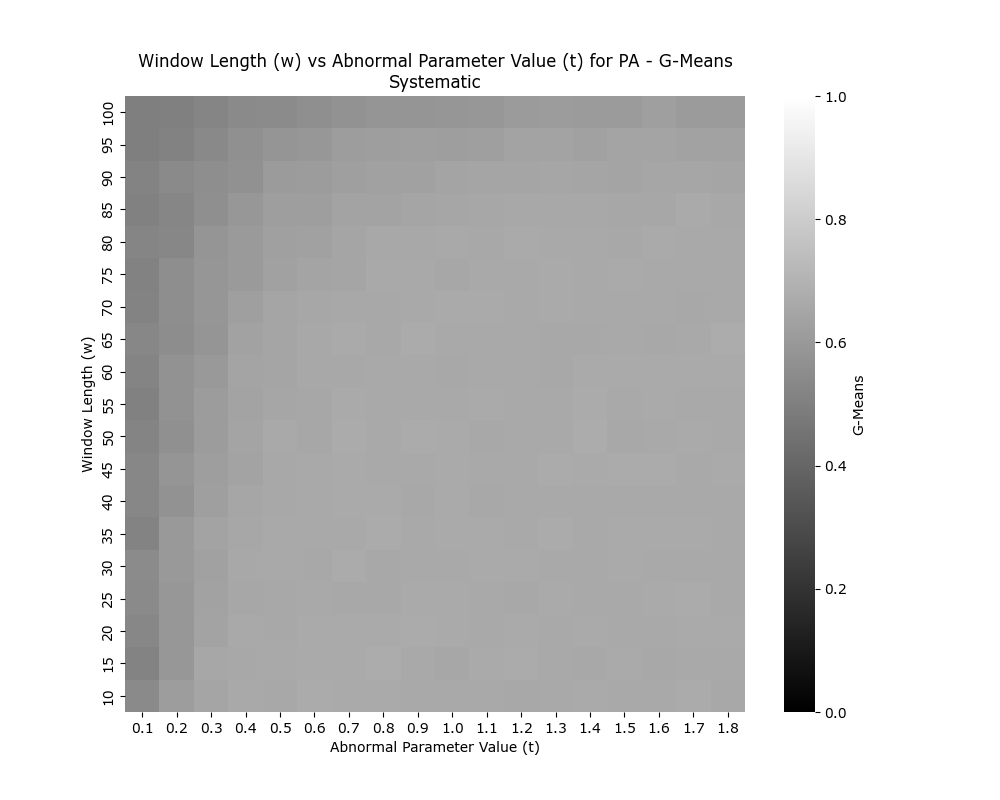
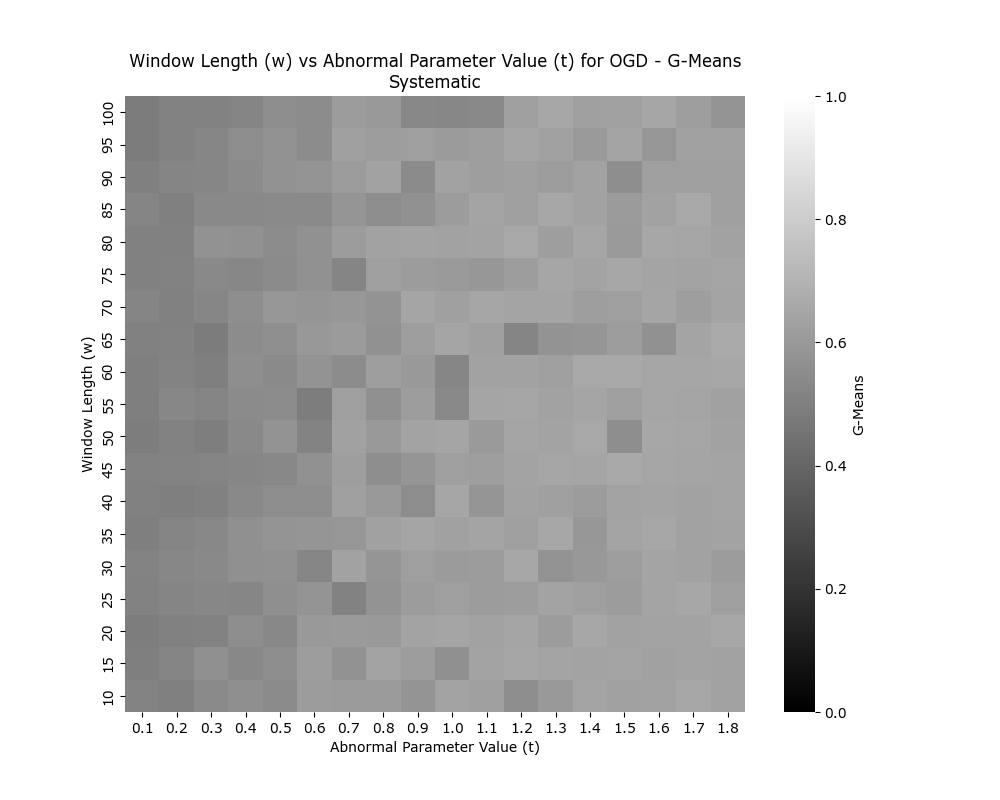
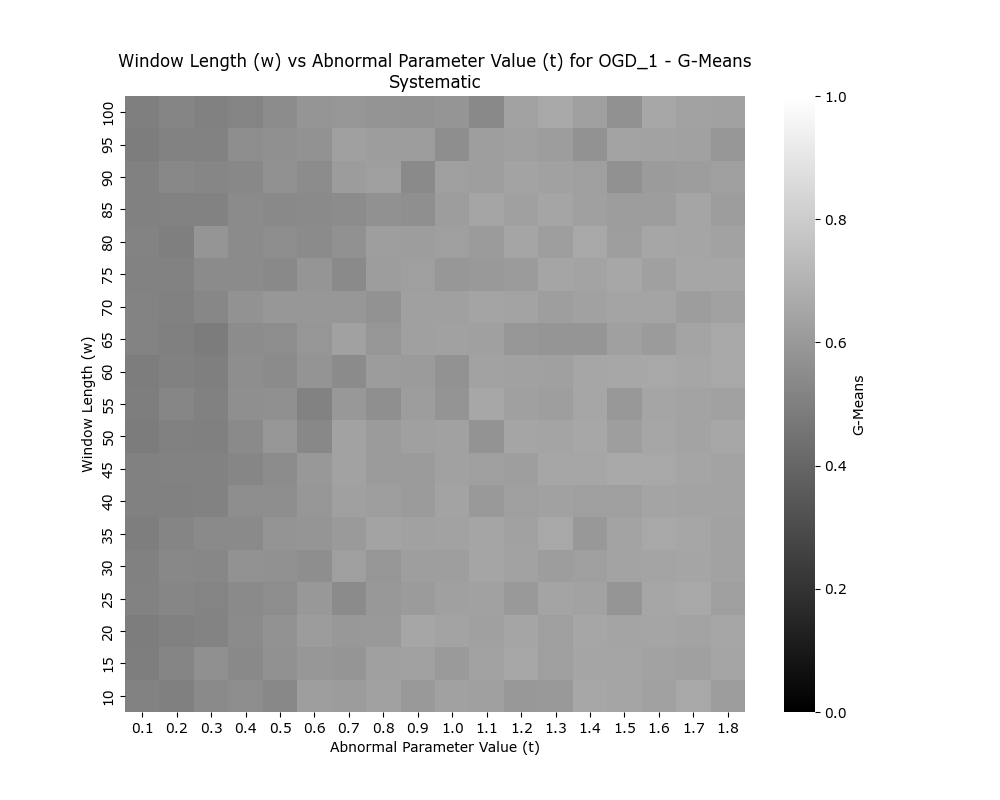
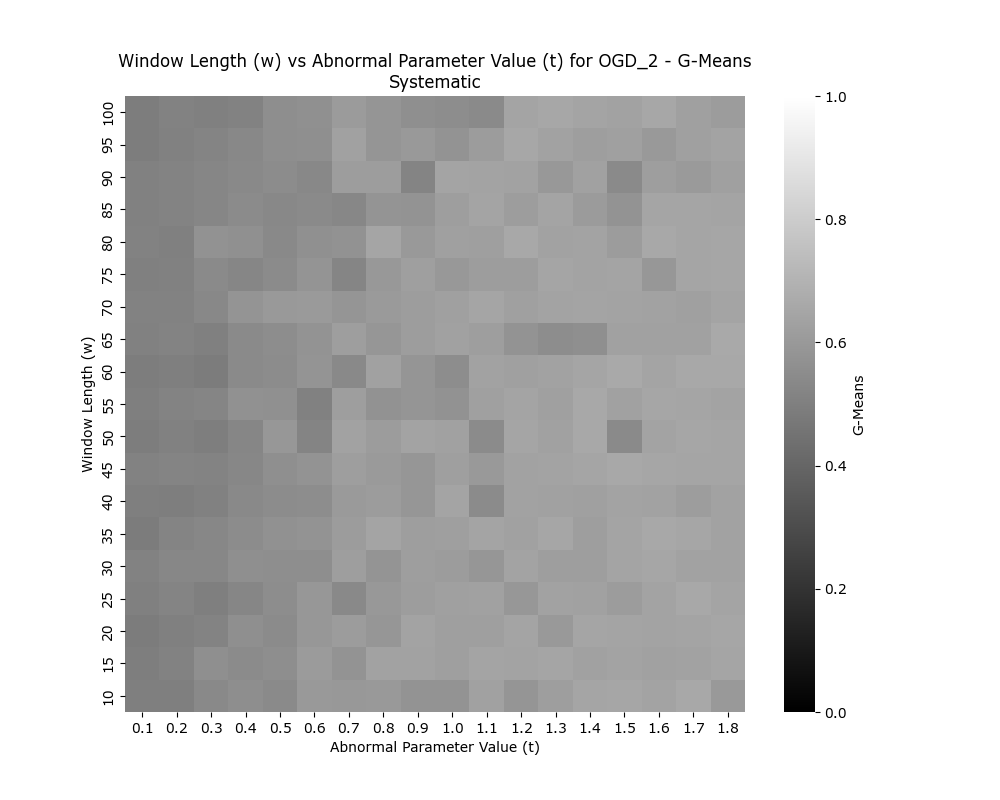
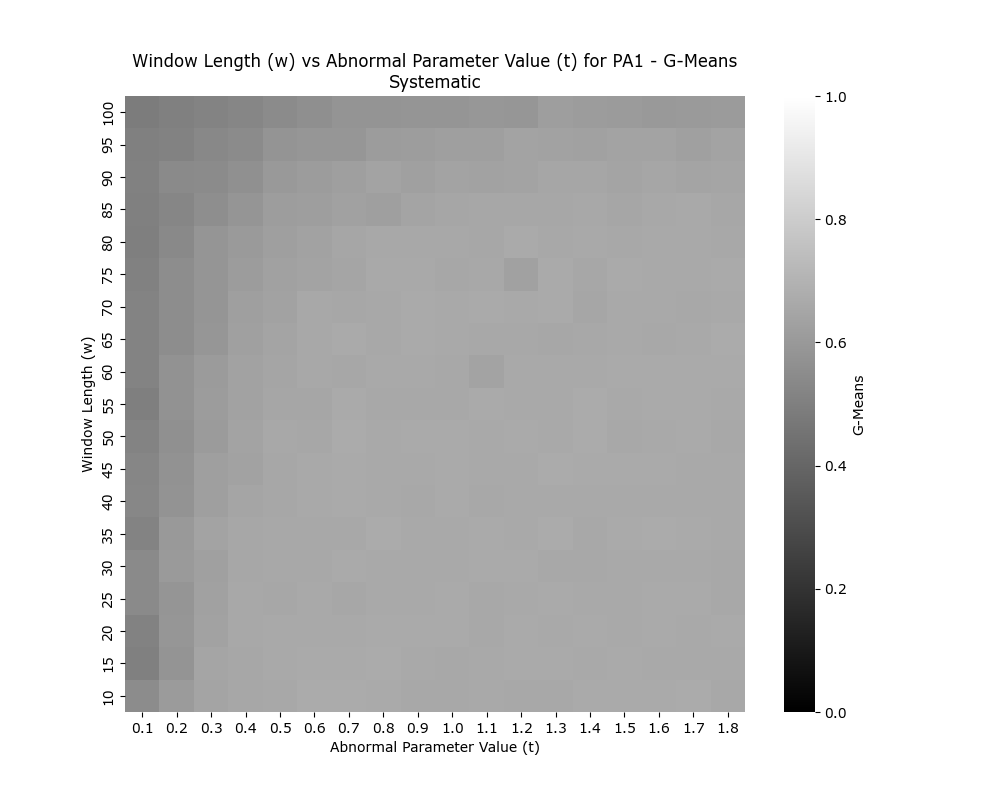
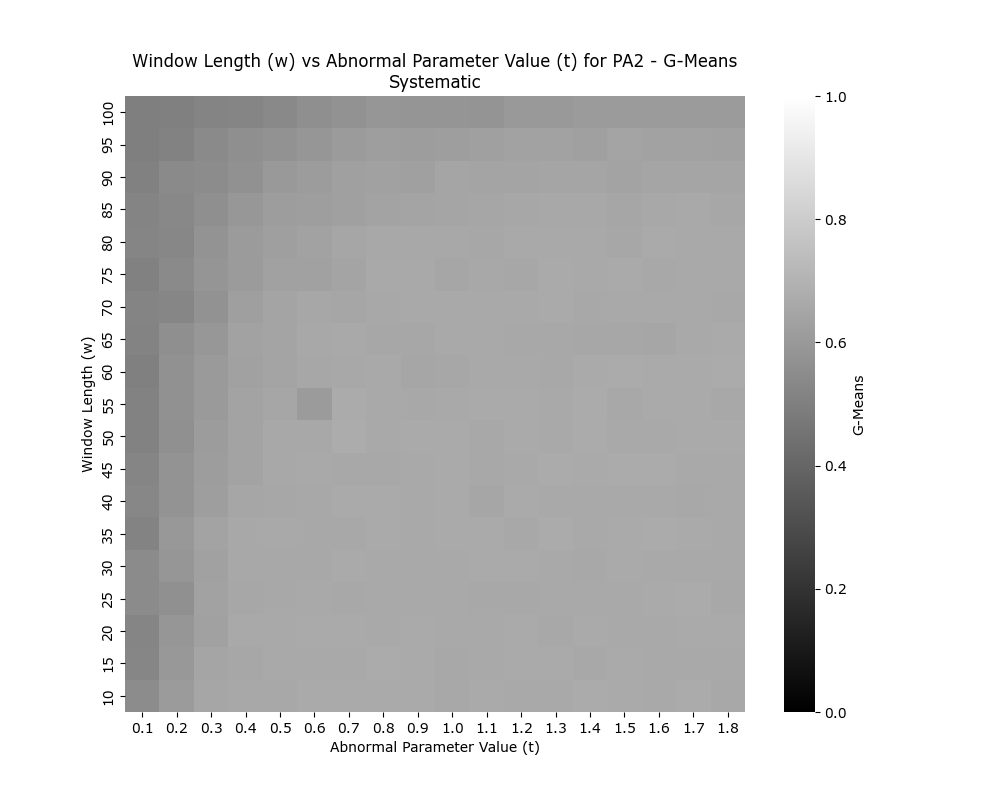
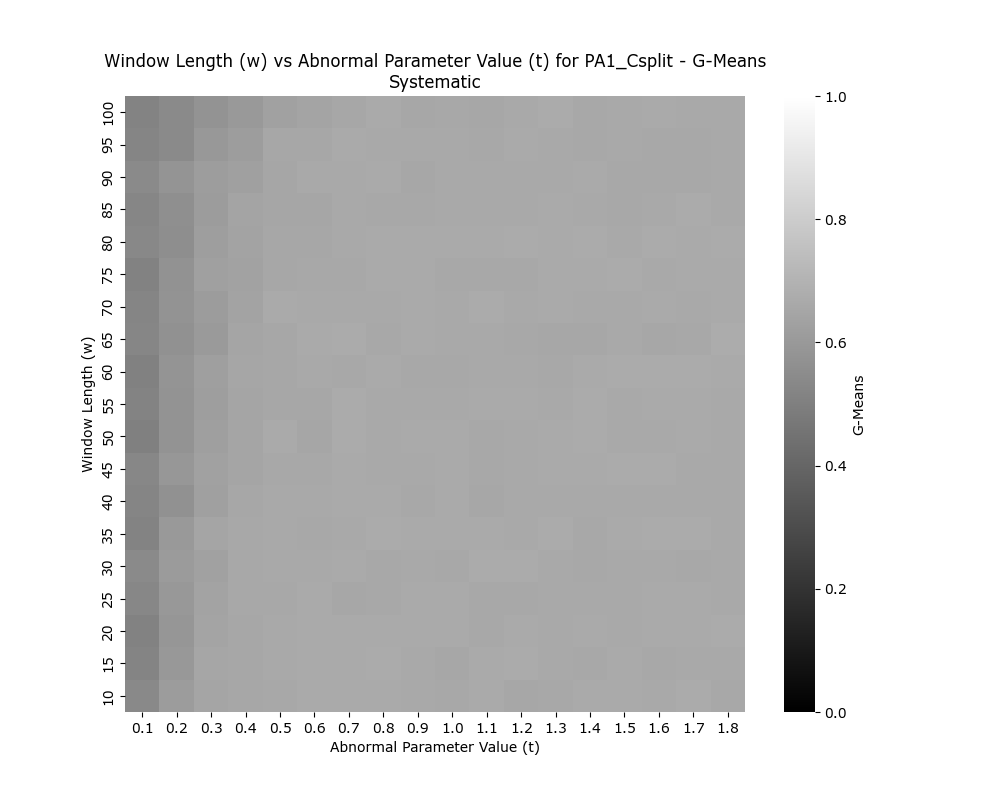
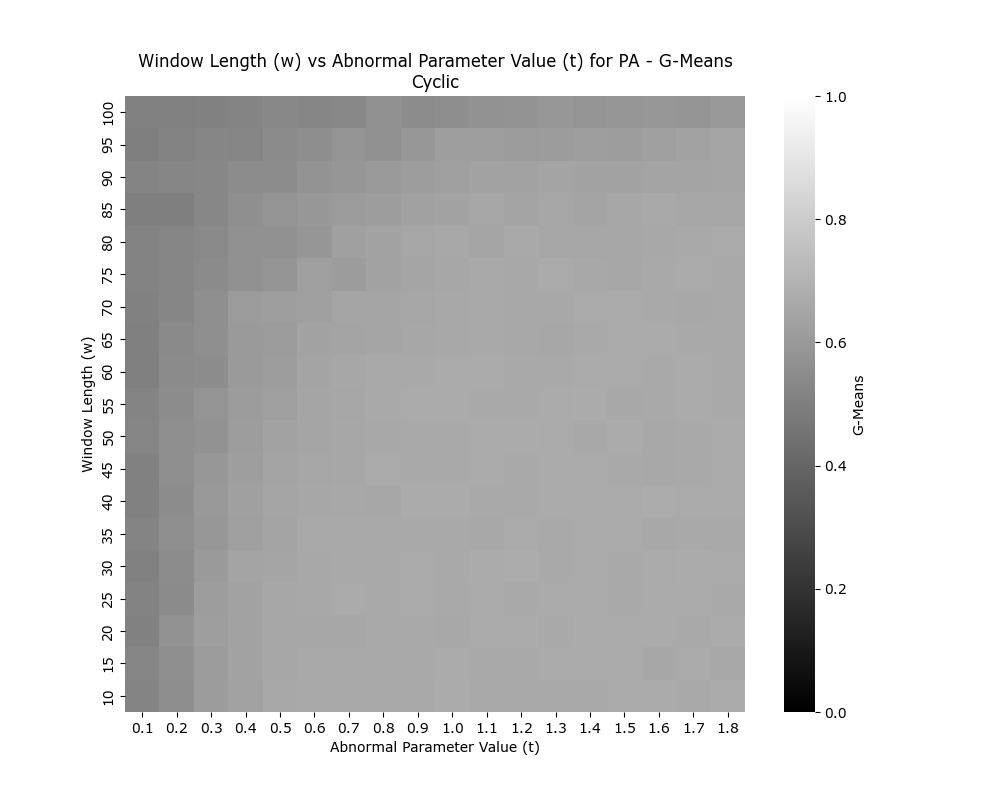
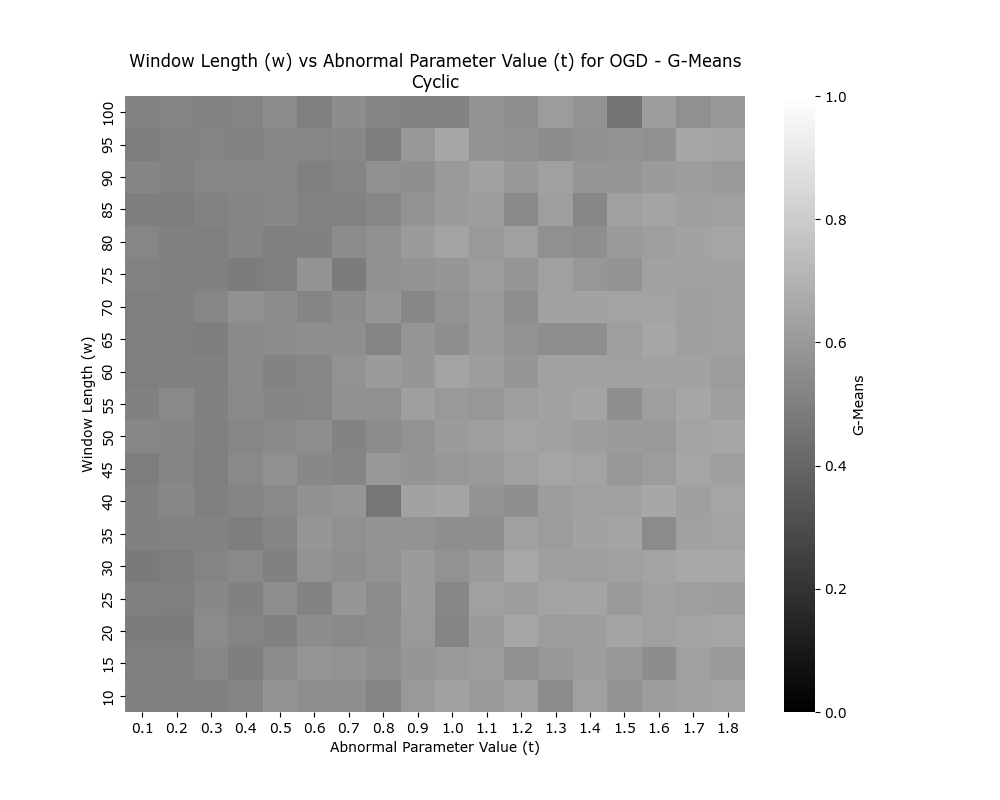
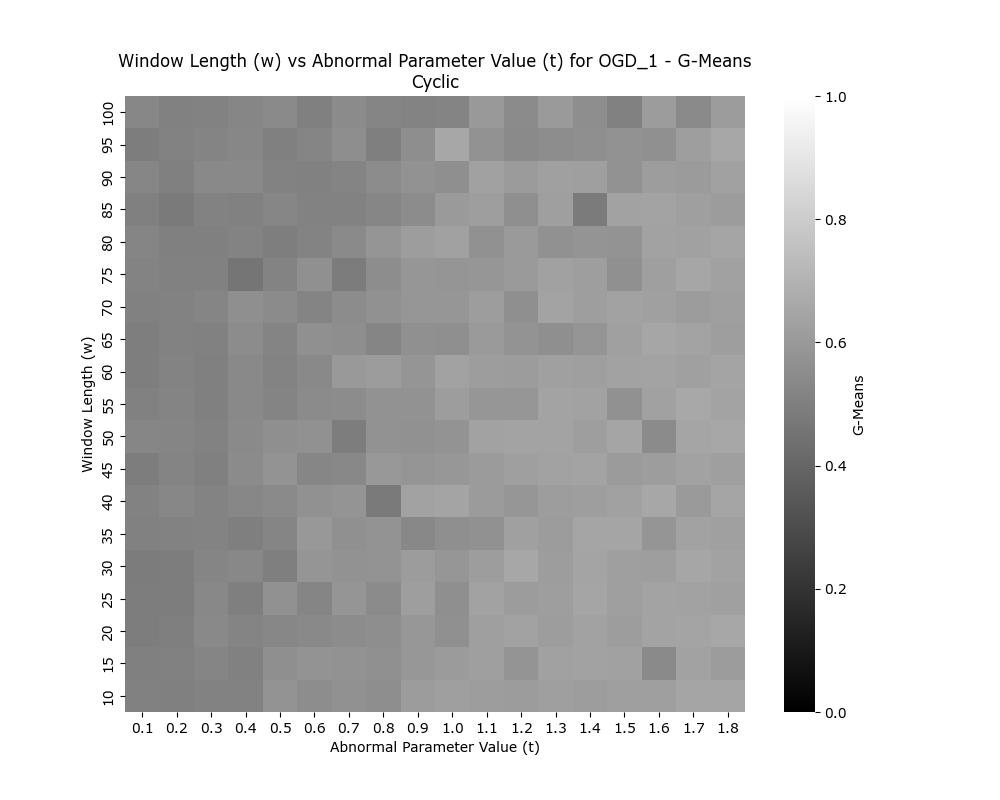
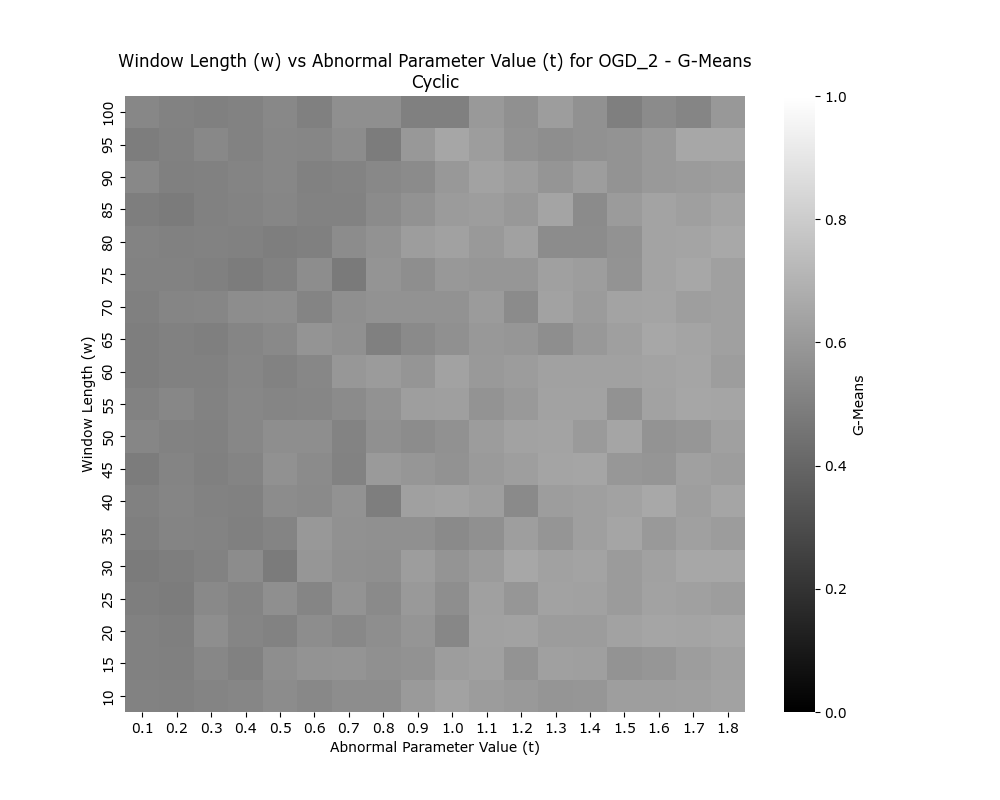
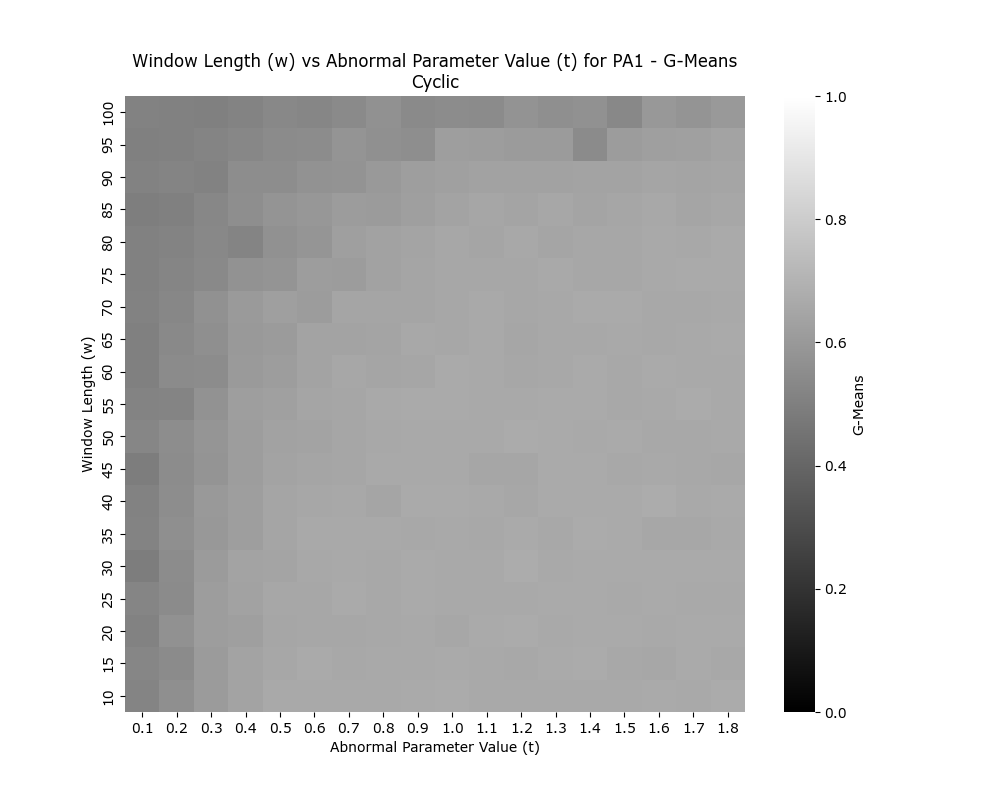
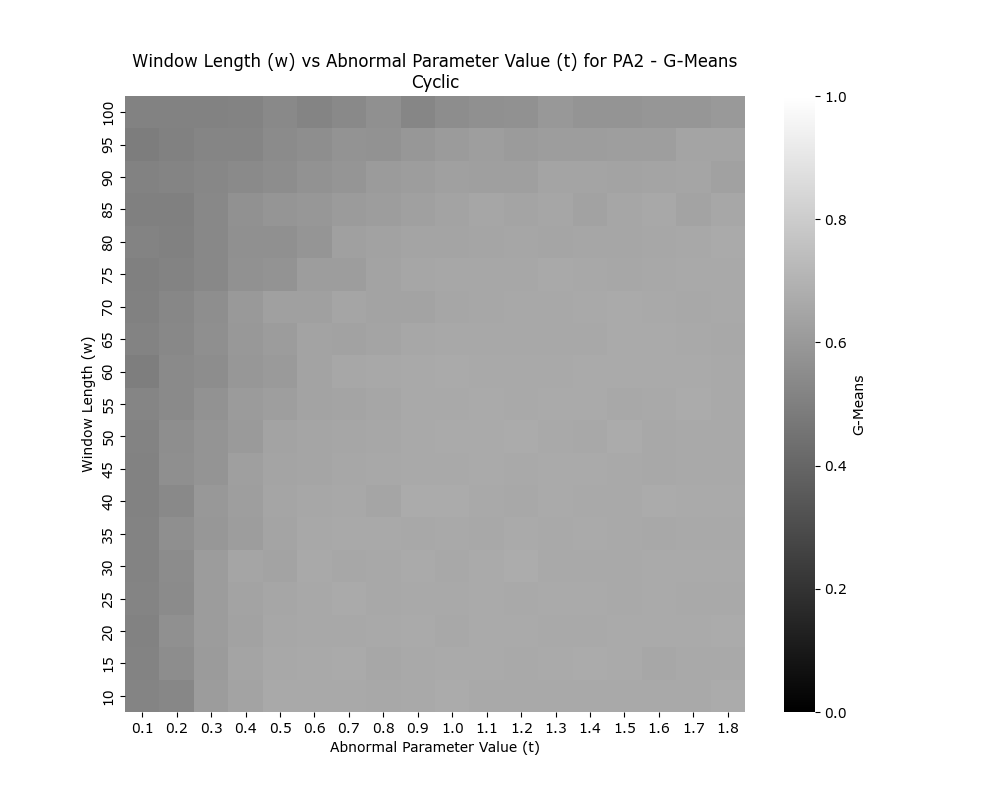
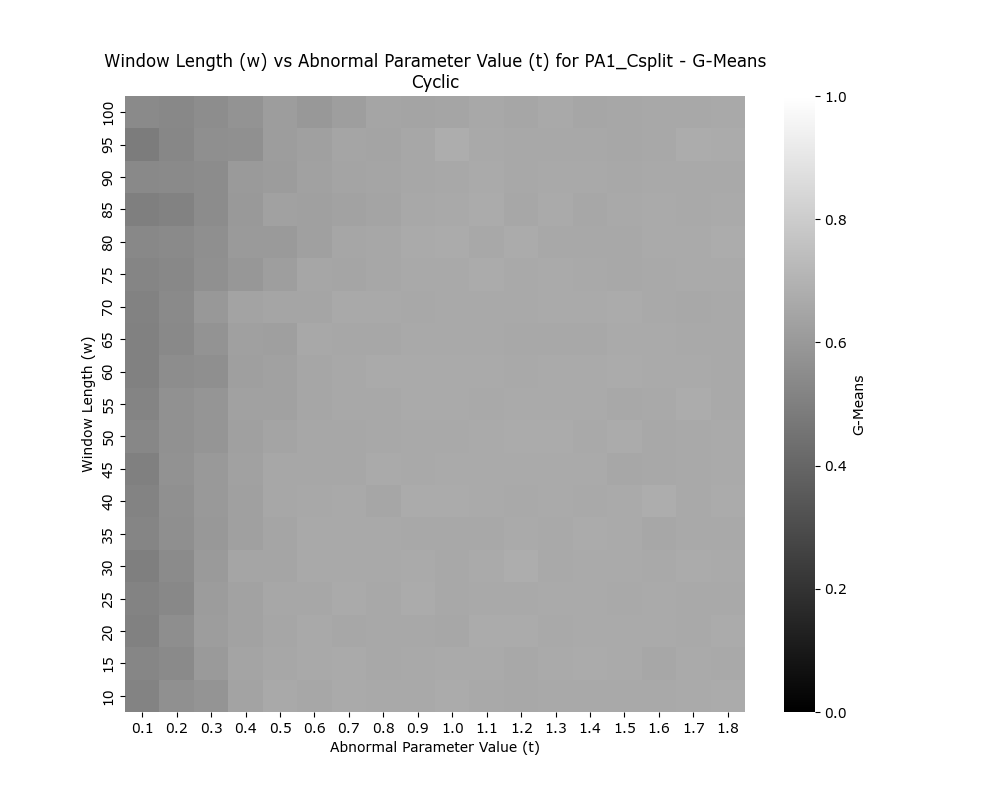
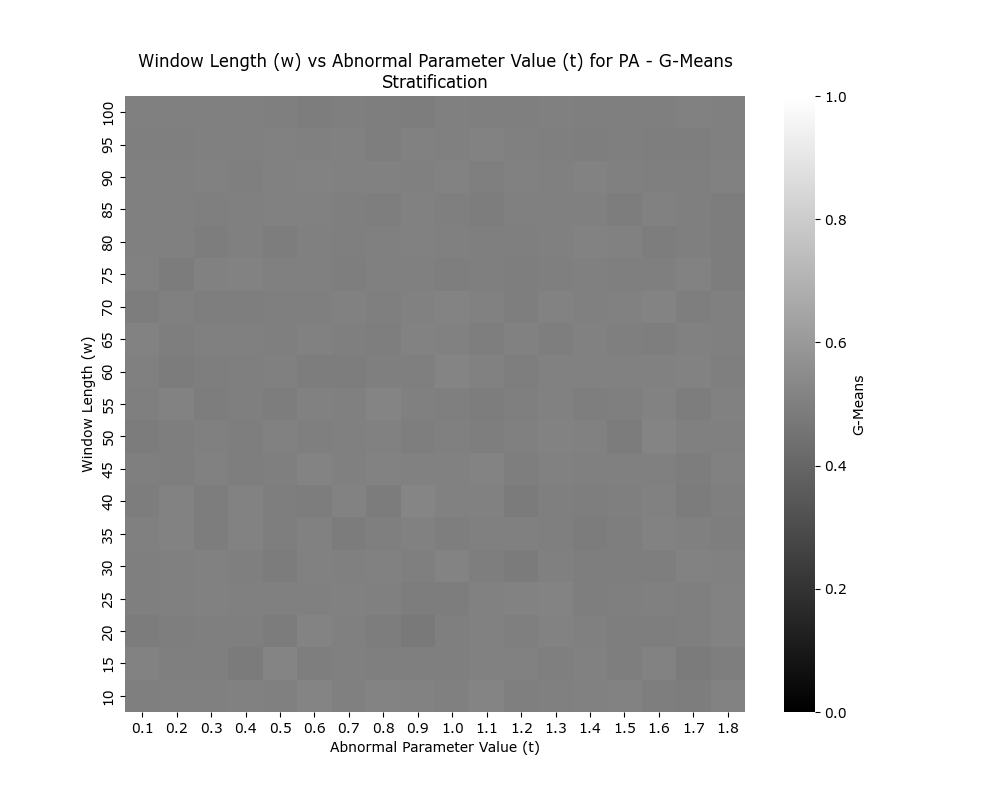
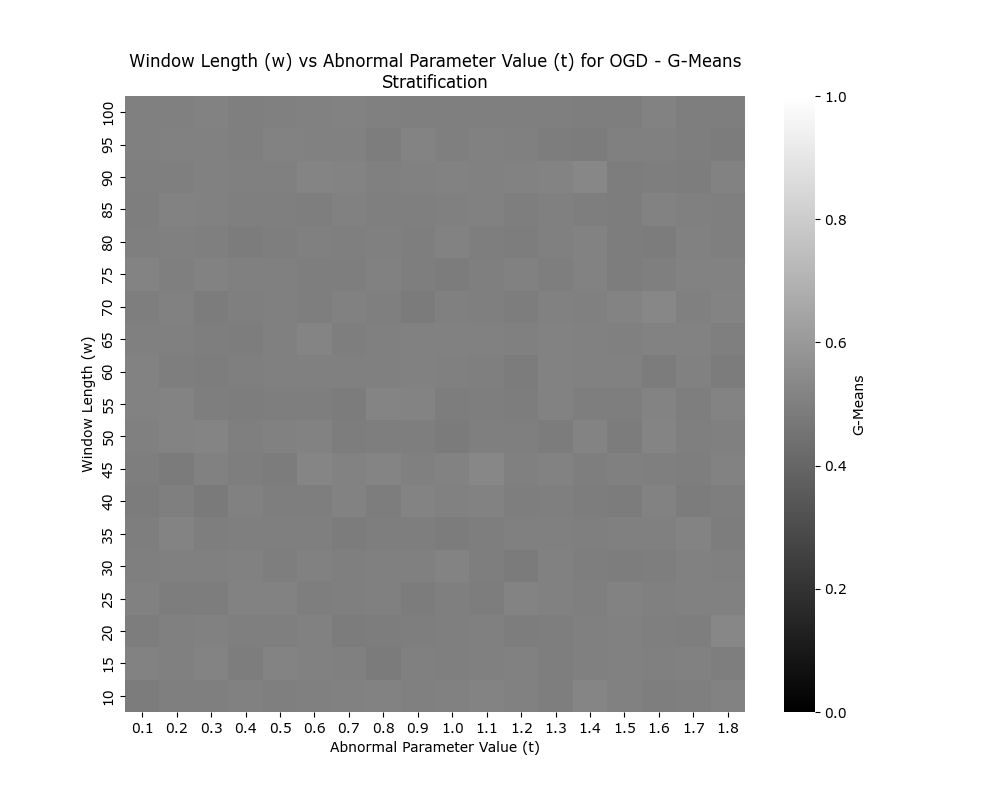
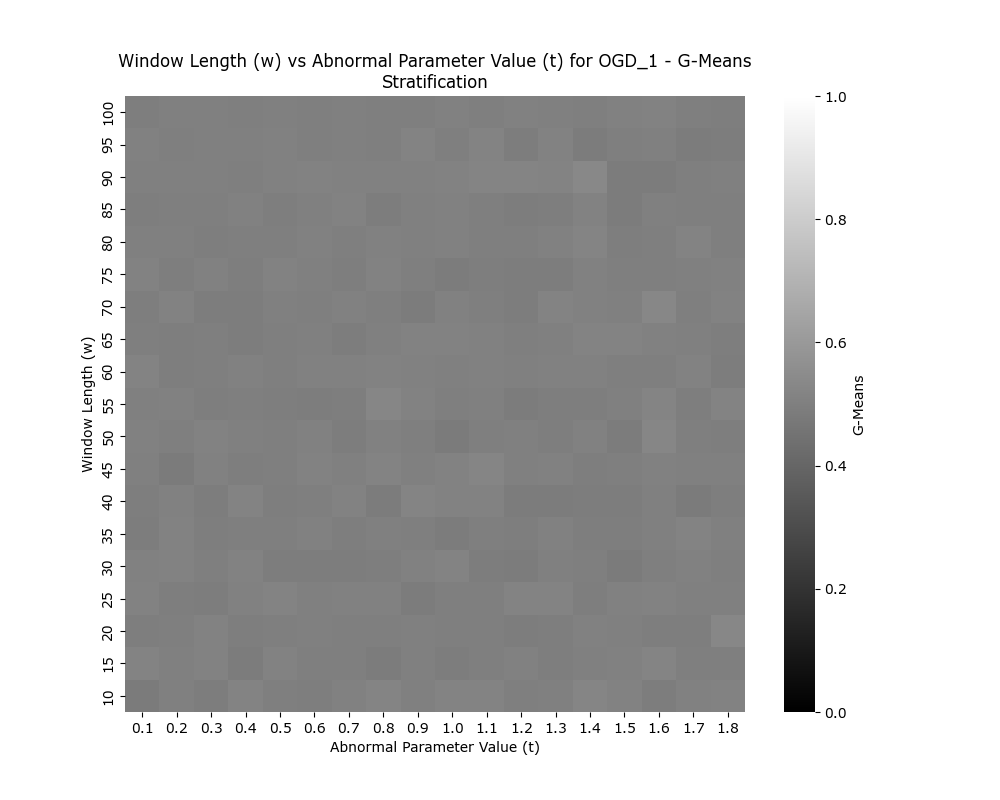
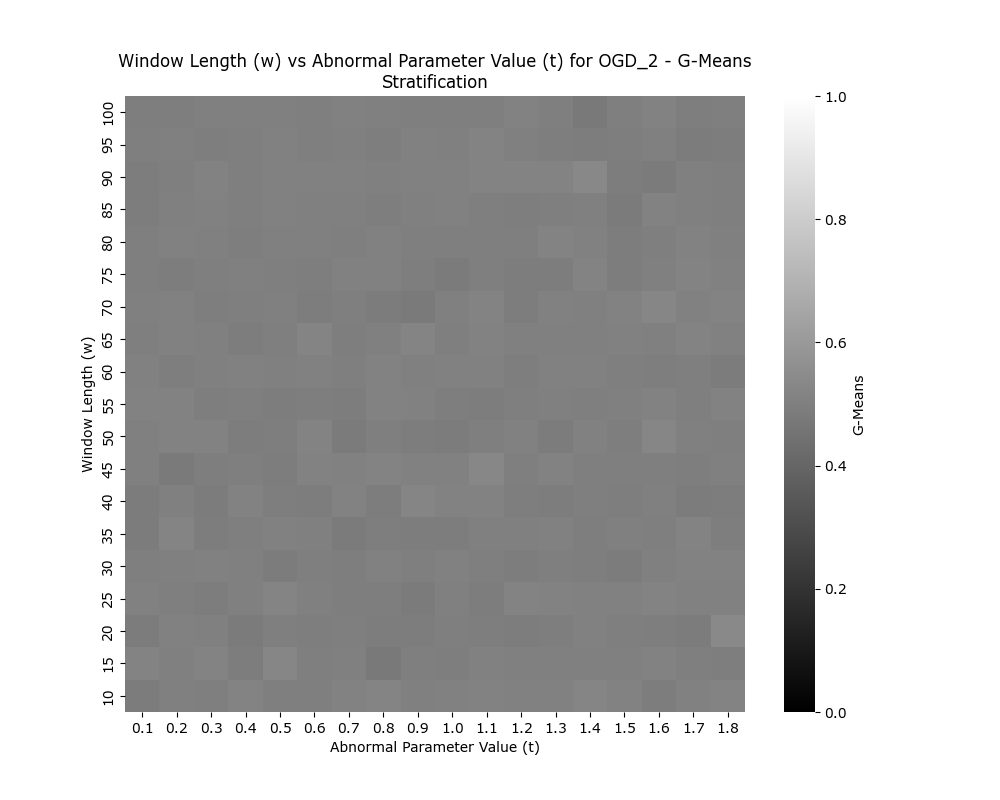
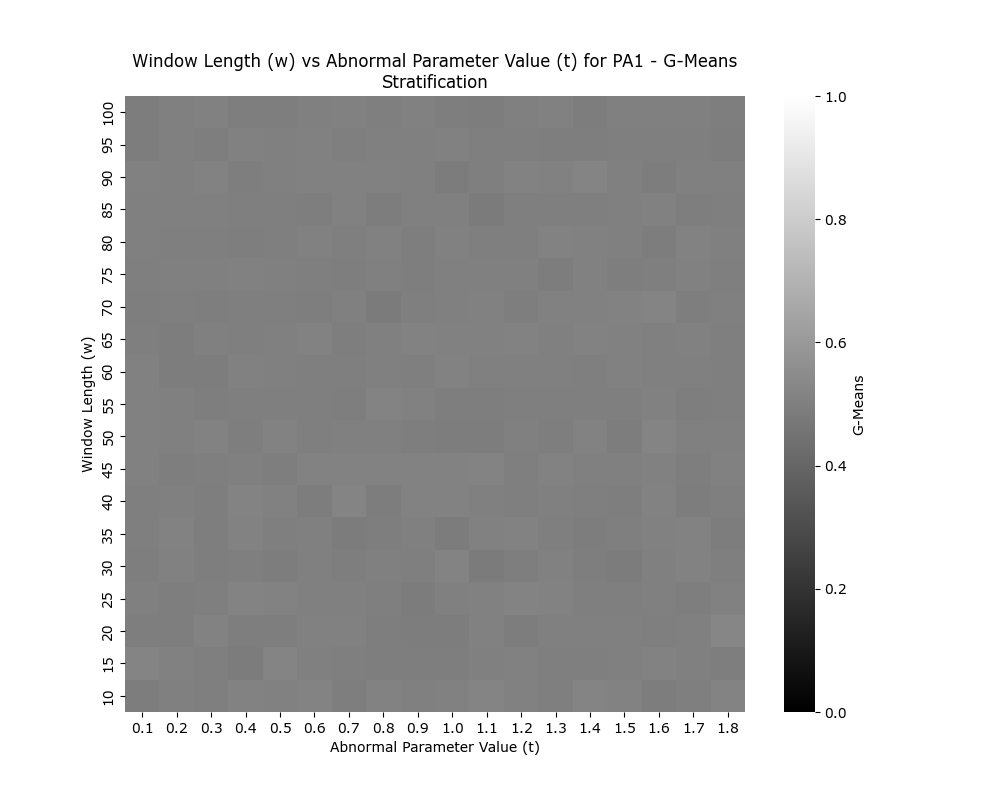
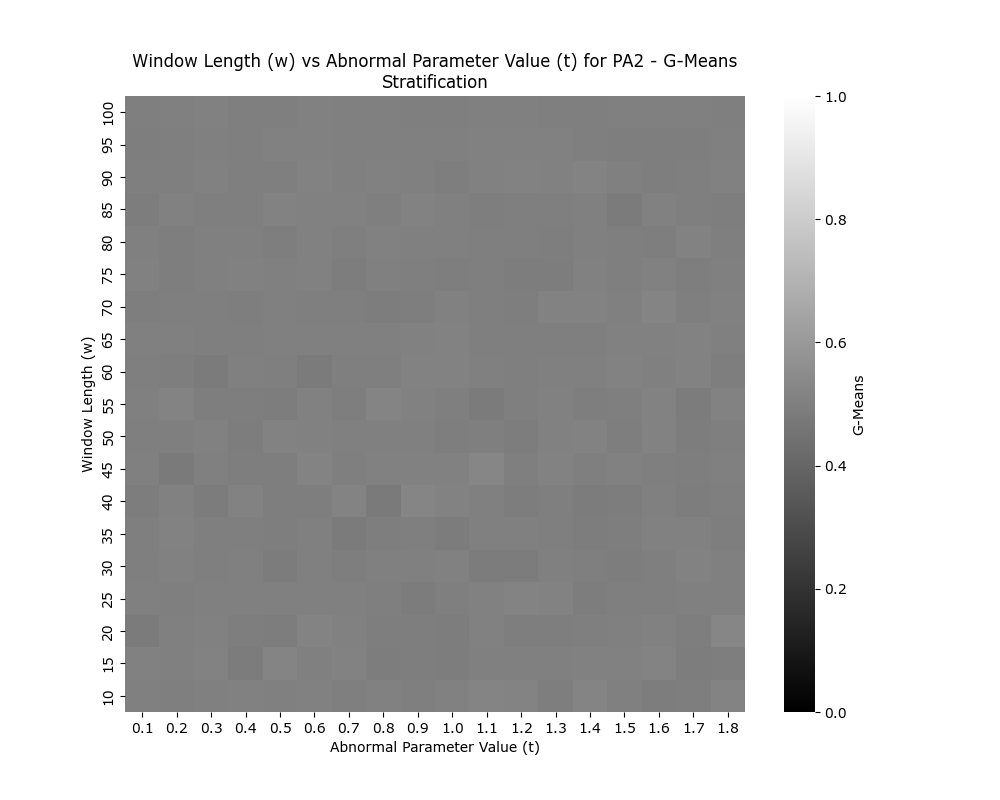
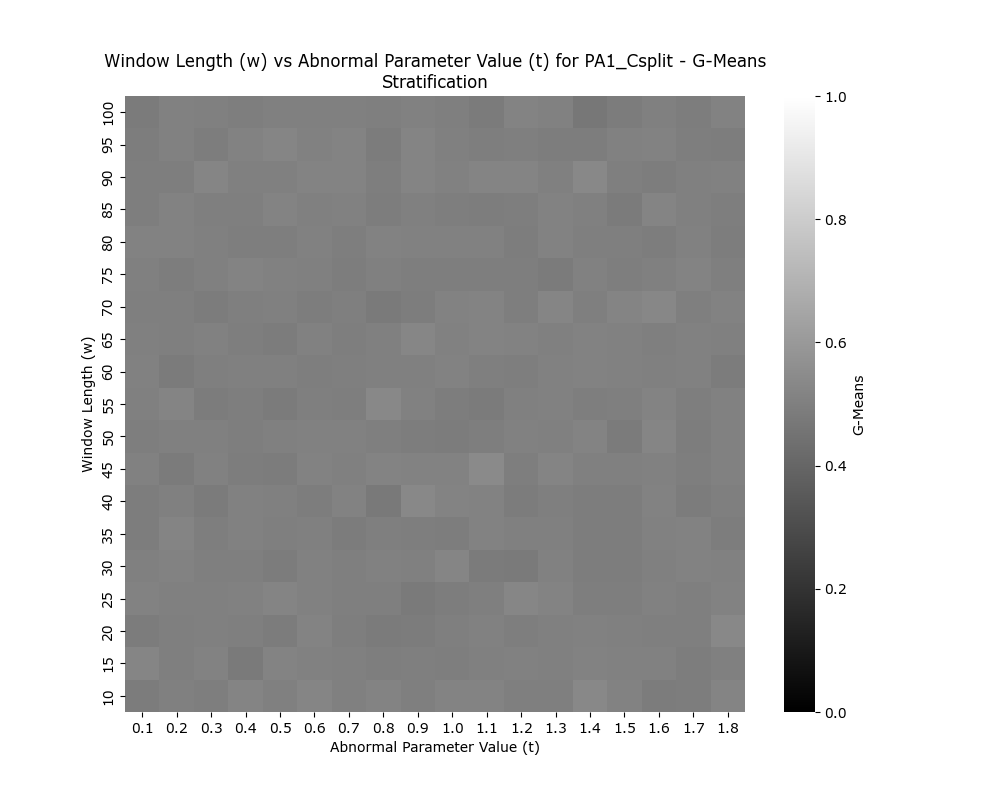

In [25]:
from IPython.display import display, HTML
import os
from PIL import Image
import io
import base64

def display_images_grid_scrollable(folder_path, algorithms, abtypes, metric, img_width=300, img_height=300):
    # Wrapping the table in a scrollable div with set width and horizontal scroll
    html = """
    <div style='width: 100%; height: auto; overflow-x: auto; white-space: nowrap;'>
    <table style='border-spacing: 10px;'>
    """  # Begin the scrollable div and the table layout
    
    for abtype in abtypes:
        html += f"<tr><td style='font-weight: bold; vertical-align: middle; white-space: nowrap'>{abtype}</td>"  # Row header for each abtype
        for algo in algorithms:
            img_path = os.path.join(folder_path, abtype, algo, f'{metric}.png')
            if os.path.exists(img_path):
                with Image.open(img_path) as img:
                    buffered = io.BytesIO()
                    img.save(buffered, format="PNG")
                    img_base64 = base64.b64encode(buffered.getvalue()).decode("ascii")
                    # Display the image with fixed width and height in a scrollable table cell
                    html += f'<td><img src="data:image/png;base64,{img_base64}" style="width:{img_width}px; height:{img_height}px; border:1px solid black;"></td>'
            else:
                html += '<td><b>Image Not Found</b></td>'  # Placeholder if image not found
        html += "</tr>"  # End row
    html += "</table></div>"  # Close the table and the scrollable div
    
    display(HTML(html))  # Display the generated HTML in the notebook

# Example usage:
folder_path = 'plots_HeatMap'  # Parent folder containing abtype subfolders
algorithms = ['PA', 'OGD', 'OGD_1', 'OGD_2', 'PA1', 'PA2', 'PA1_Csplit']  # List of algorithms, you can add more here
abtypes = [f'abtype{i}' for i in range(1, 8)]  # abtype1, abtype2, etc.
metric = 'G-means'  # Performance metric to display (e.g., G-means, Accuracies, etc.)

# Increase the image size by specifying img_width and img_height
display_images_grid_scrollable(folder_path, algorithms, abtypes, metric, img_width=400, img_height=300)
